**ABSTRACT**

I'm going do AutoML (H2O) with Chronic Kidney Disease Dataset. First we will commit some mistakes and see how important is to check the output. I have tried to do all the explainations of output and codes. We will first check with GLM and GBM methods and then AutoML. This work details the development of a classification model We employed advanced interpretability techniques, including PDP and SHAP values, to evaluate the influence of predictors on the model outcomes. The ensemble model showed significant predictive power with well-managed multicollinearity and a rigorous approach to model validation. Residual analysis confirmed the absence of bias in predictions. The project exemplifies high coding standards, with a clear, well-documented notebook facilitating reproducibility. Overall, the model demonstrates strong potential for accurately classifying instances in the given dataset.

**ABOUT** **DATA**

The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. There are 400 rows
Features
We use 24 + class = 25 ( 11  numeric ,14  nominal)
1.Age(numerical)
  	  	age in years
 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
 	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
 	4.Albumin(nominal)
		al - (0,1,2,3,4,5)
 	5.Sugar(nominal)
		su - (0,1,2,3,4,5)
 	6.Red Blood Cells(nominal)
		rbc - (normal,abnormal)
 	7.Pus Cell (nominal)
		pc - (normal,abnormal)
 	8.Pus Cell clumps(nominal)
		pcc - (present,notpresent)
 	9.Bacteria(nominal)
		ba  - (present,notpresent)
 	10.Blood Glucose Random(numerical)
		bgr in mgs/dl
 	11.Blood Urea(numerical)
		bu in mgs/dl
 	12.Serum Creatinine(numerical)
		sc in mgs/dl
 	13.Sodium(numerical)
		sod in mEq/L
 	14.Potassium(numerical)
		pot in mEq/L
 	15.Hemoglobin(numerical)
		hemo in gms
 	16.Packed  Cell Volume(numerical)
 	17.White Blood Cell Count(numerical)
		wc in cells/cumm
 	18.Red Blood Cell Count(numerical)
		rc in millions/cmm
 	19.Hypertension(nominal)
		htn - (yes,no)
 	20.Diabetes Mellitus(nominal)
		dm - (yes,no)
 	21.Coronary Artery Disease(nominal)
		cad - (yes,no)
 	22.Appetite(nominal)
		appet - (good,poor)
 	23.Pedal Edema(nominal)
		pe - (yes,no)
 	24.Anemia(nominal)
		ane - (yes,no)
 	25.Class (nominal)
		class - (ckd,notckd)

In [91]:
# Download the file from GitHub
!wget https://raw.githubusercontent.com/vikram17036/DSMT/main/kidney_disease1.csv -O kidney_disease2.csv
# Import pandas
import pandas as pd

# Load the downloaded CSV file into a pandas DataFrame
df = pd.read_csv('kidney_disease2.csv')

# Display the first few rows of the DataFrame
print(df.head())

--2024-02-20 00:47:21--  https://raw.githubusercontent.com/vikram17036/DSMT/main/kidney_disease1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42107 (41K) [text/plain]
Saving to: ‘kidney_disease2.csv’

kidney_disease2.csv 100%[===================>]  41.12K  --.-KB/s    in 0.01s   

2024-02-20 00:47:21 (3.90 MB/s) - ‘kidney_disease2.csv’ saved [42107/42107]

    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  

In [92]:
df.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  

[5 rows x 25 columns]

In [94]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [97]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
#sns.set(rc={"figure.figsize": (16, 8)})

In [99]:
 #Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [100]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

4


In [101]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:8113..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpeah8drdw
  JVM stdout: /tmp/tmpeah8drdw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpeah8drdw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:8113
Connecting to H2O server at http://127.0.0.1:8113 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_mtqg2k
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:8113
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [102]:
df.describe()

age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  381.000000  383.000000  313.000000  312.000000  348.000000  
mean    57.425722    3.072454  137.528754    4.627244   12.526437  
std     50.503006    5.741126   10.408752    3.193904    2.912587  
min      1.500000    0.400000    4.500000    2.500000    3.100000  
25%     27.000000    0.900000  135.000000    3.800000   10.300000  
50%     42.000000    1.300000  138.000000    4.400000   12.650000  
75%     66.000000    2.800000  142.000000    4.900000   15.000000  
max    391.000000   76.000000  163.000000   47.000000   17.800000

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [104]:
import pandas as pd
df.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [105]:
df.shape  # Shape of the dataframe - Here, we have 418 samples of data with 19 predictors and 1 result

(400, 25)

In [106]:
columns = list(df.columns)
print(columns)  # Name of all predictors and result

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [ ]:
The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

In [107]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print('numerical columns List-',numeric_columns)
print('categorical columns List-',categorical_columns)

numerical columns List- Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'], dtype='object')
categorical columns List- Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [108]:
# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Create a DataFrame to show missing values
missing_data_info = pd.DataFrame({
    'Column': columns_with_missing,
    'Missing Values': df[columns_with_missing].isnull().sum(),
    'Percentage Missing': (df[columns_with_missing].isnull().sum() / len(df)) * 100
})

# Display the information about missing values
print("Columns with Missing Data:")
print(missing_data_info)

Columns with Missing Data:
      Column  Missing Values  Percentage Missing
age      age               9                2.25
bp        bp              12                3.00
sg        sg              47               11.75
al        al              46               11.50
su        su              49               12.25
rbc      rbc             152               38.00
pc        pc              65               16.25
pcc      pcc               4                1.00
ba        ba               4                1.00
bgr      bgr              44               11.00
bu        bu              19                4.75
sc        sc              17                4.25
sod      sod              87               21.75
pot      pot              88               22.00
hemo    hemo              52               13.00
pcv      pcv              70               17.50
wc        wc             105               26.25
rc        rc             130               32.50
htn      htn               2              

In [109]:
# Impute missing values for numerical columns with mean
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Impute missing values for categorical columns with the most frequent value (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [110]:
df.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [114]:

# Assuming 'classification' is your target variable and it's categorical with values 'ckd' and 'notckd'
# Encode 'classification' as a numeric variable
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

# For simplicity, this example assumes all other columns are numeric or have been preprocessed to numeric.
# If you have categorical variables, consider using pd.get_dummies() to one-hot encode them.

# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlations of all features with the target variable 'classification'
correlations_with_target = correlation_matrix['classification'].sort_values(ascending=False)

# Display the correlations with the target variable
print(correlations_with_target)


classification    1.000000
al                0.599085
bgr               0.401306
bu                0.374223
su                0.329240
sc                0.294910
bp                0.293489
age               0.222421
pot               0.077215
sod              -0.342293
sg               -0.698994
hemo             -0.729693
Name: classification, dtype: float64


<ipython-input-114-7c067873759f>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [115]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('classification ~age + bp + al + su + bgr + bu + sc + pot + hemo + rbc + pc + pcc + ba + pcv + wc + rc + htn + dm + cad + appet + pe + ane', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         classification   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     8.941
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           3.49e-46
Time:                        01:01:45   Log-Likelihood:                 177.92
No. Observations:                 398   AIC:                             40.16
Df Residuals:                     200   BIC:                             829.5
Df Model:                         197                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1863      0.479      2.476      0.014       0.241       2.131
rbc[T.normal]     -0.0440      0.063     -0.703      0.483      -0.167       0.079
pc[T.normal]       0.0385      0.059      0.651      0.516      -0.078       0.155
pcc[T.present]     0.0022      0.065      0.034      0.973      -0.126       0.130
ba[T.present]      0.0108      0.079      0.136      0.892      -0.146       0.167
pcv[T.	?]          0.0595      0.232      0.256      0.798      -0.398       0.517
pcv[T.14]          0.0120      0.270      0.045      0.965      -0.520       0.544
pcv[T.15]          0.1482      0.244      0.608      0.544      -0.333       0.629
pcv[T.16]         -0.3305      0.444     -0.745      0.457      -1.206       0.545
pcv[T.17]         -0.1156      0.305     -0.379      0.705      -0.717       0.485
pcv[T.18]          0.0136      0.188      0.072      0.942      -0.356       0.384
pcv[T.19]         -0.0521      0.298     -0.175      0.862      -0.640       0.536
pcv[T.20]         -0.2181      0.273     -0.798      0.426      -0.757       0.321
pcv[T.21]          0.1543      0.236      0.654      0.514      -0.311       0.620
pcv[T.22]         -0.3237      0.666     -0.486      0.628      -1.637       0.990
pcv[T.23]         -0.1406      0.352     -0.400      0.690      -0.834       0.553
pcv[T.24]          0.1001      0.174      0.575      0.566      -0.243       0.443
pcv[T.25]          0.3948      0.183      2.159      0.032       0.034       0.755
pcv[T.26]         -0.0387      0.159     -0.243      0.808      -0.352       0.275
pcv[T.27]          0.1432      0.154      0.932      0.352      -0.160       0.446
pcv[T.28]          0.0149      0.099      0.151      0.880      -0.180       0.210
pcv[T.29]          0.0242      0.131      0.185      0.853      -0.234       0.282
pcv[T.30]          0.0747      0.128      0.582      0.562      -0.178       0.328
pcv[T.31]         -0.0390      0.115     -0.338      0.735      -0.266       0.188
pcv[T.32]          0.1399      0.091      1.542      0.125      -0.039       0.319
pcv[T.33]          0.1852      0.089      2.071      0.040       0.009       0.362
pcv[T.34]          0.2909      0.124      2.352      0.020       0.047       0.535
pcv[T.35]          0.3212      0.125      2.573      0.011       0.075       0.567
pcv[T.36]          0.2981      0.097      3.065      0.002       0.106       0.490
pcv[T.37]          0.2737      0.104      2.630      0.009       0.068       0.479
pcv[T.38]          0.2955      0.121      2.434      0.016       0.056       0.535
pcv[T.39]          0.1907      0.107      1.784      0.076      -0.020       0.401
pcv[T.40]          0.0690      0.096      0.722      0.471      -0.120       0.258
pcv[T.41]          0.1183      0.060      1.977      0.049       0.000       0.236
pcv[T.42]   

In [69]:
#Imputing Data
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = num_imputer.fit_transform(df[numeric_columns])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

In [70]:
missing_value = df.isnull().sum()
missing_value
#AS we can see we have no missing values we are good to go

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [71]:
!pip3 install h2o

In [72]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [73]:
# Importing Libraries
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set(rc={"figure.figsize": (16, 8)})

In [74]:
# Configuring the maximum allowed runtime for Automated Machine Learning (AutoML).
min_mem_size = 6
run_time = 222


In [75]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

5


In [76]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:45879..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp__dyojbj
  JVM stdout: /tmp/tmp__dyojbj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp__dyojbj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:45879
Connecting to H2O server at http://127.0.0.1:45879 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_okn14u
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:45879
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [77]:
df.describe()

id         age          bp          sg          al          su  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   16.974966   13.476298    0.005369    1.272318    1.029487   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.015000    0.000000    0.000000   
50%    199.500000   54.000000   78.234536    1.017408    1.000000    0.000000   
75%    299.250000   64.000000   80.000000    1.020000    2.000000    0.450142   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     74.782634   49.285887    5.617490    9.204273    2.819783    2.716171  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%    101.000000   27.000000    0.900000  135.000000    4.000000   10.875000  
50%    126.000000   44.000000    1.400000  137.528754    4.627244   12.526437  
75%    150.000000   61.750000    3.072454  141.000000    4.800000   14.625000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [79]:
df.shape  # Shape of the dataframe - Here, we have 400 samples of data with 24 predictors and 1 result

(400, 26)

In [80]:

# Assuming 'classification' is your target variable and it's categorical with values 'ckd' and 'notckd'
# Encode 'classification' as a numeric variable
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

# For simplicity, this example assumes all other columns are numeric or have been preprocessed to numeric.
# If you have categorical variables, consider using pd.get_dummies() to one-hot encode them.

# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlations of all features with the target variable 'classification'
correlations_with_target = correlation_matrix['classification'].sort_values(ascending=False)

# Display the correlations with the target variable
print(correlations_with_target)


classification    1.000000
al                0.599085
bgr               0.401306
bu                0.374223
su                0.329240
sc                0.294910
bp                0.293489
age               0.222421
pot               0.077215
sod              -0.342293
sg               -0.698994
hemo             -0.729693
id               -0.839725
Name: classification, dtype: float64


<ipython-input-80-7c067873759f>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation Analysis:-

Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, plotting each variable on the x and y axes. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light maroon) to high (e.g. dark maroon).

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends and identify strongly correlated variables (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

Below are the conclusions made from the above heatmap:-
High Positive Correlation: Strong positive correlations are indicated by the darker blue colors. For example:

sg (specific gravity) and hemo (hemoglobin) show a strong positive correlation, suggesting that higher values of specific gravity are associated with higher hemoglobin levels.
High Negative Correlation: Strong negative correlations are indicated by darker shades of blue on the negative side. However, from the heatmap provided, it does not appear that there are any variables with a very high negative correlation (close to -1).

No or Weak Correlation: Lighter shades of blue indicate a weaker correlation. Variables that appear to have little to no correlation include:

age and bp (blood pressure) do not show a strong correlation.
al (albumin) and sod (sodium) also show a weak correlation.

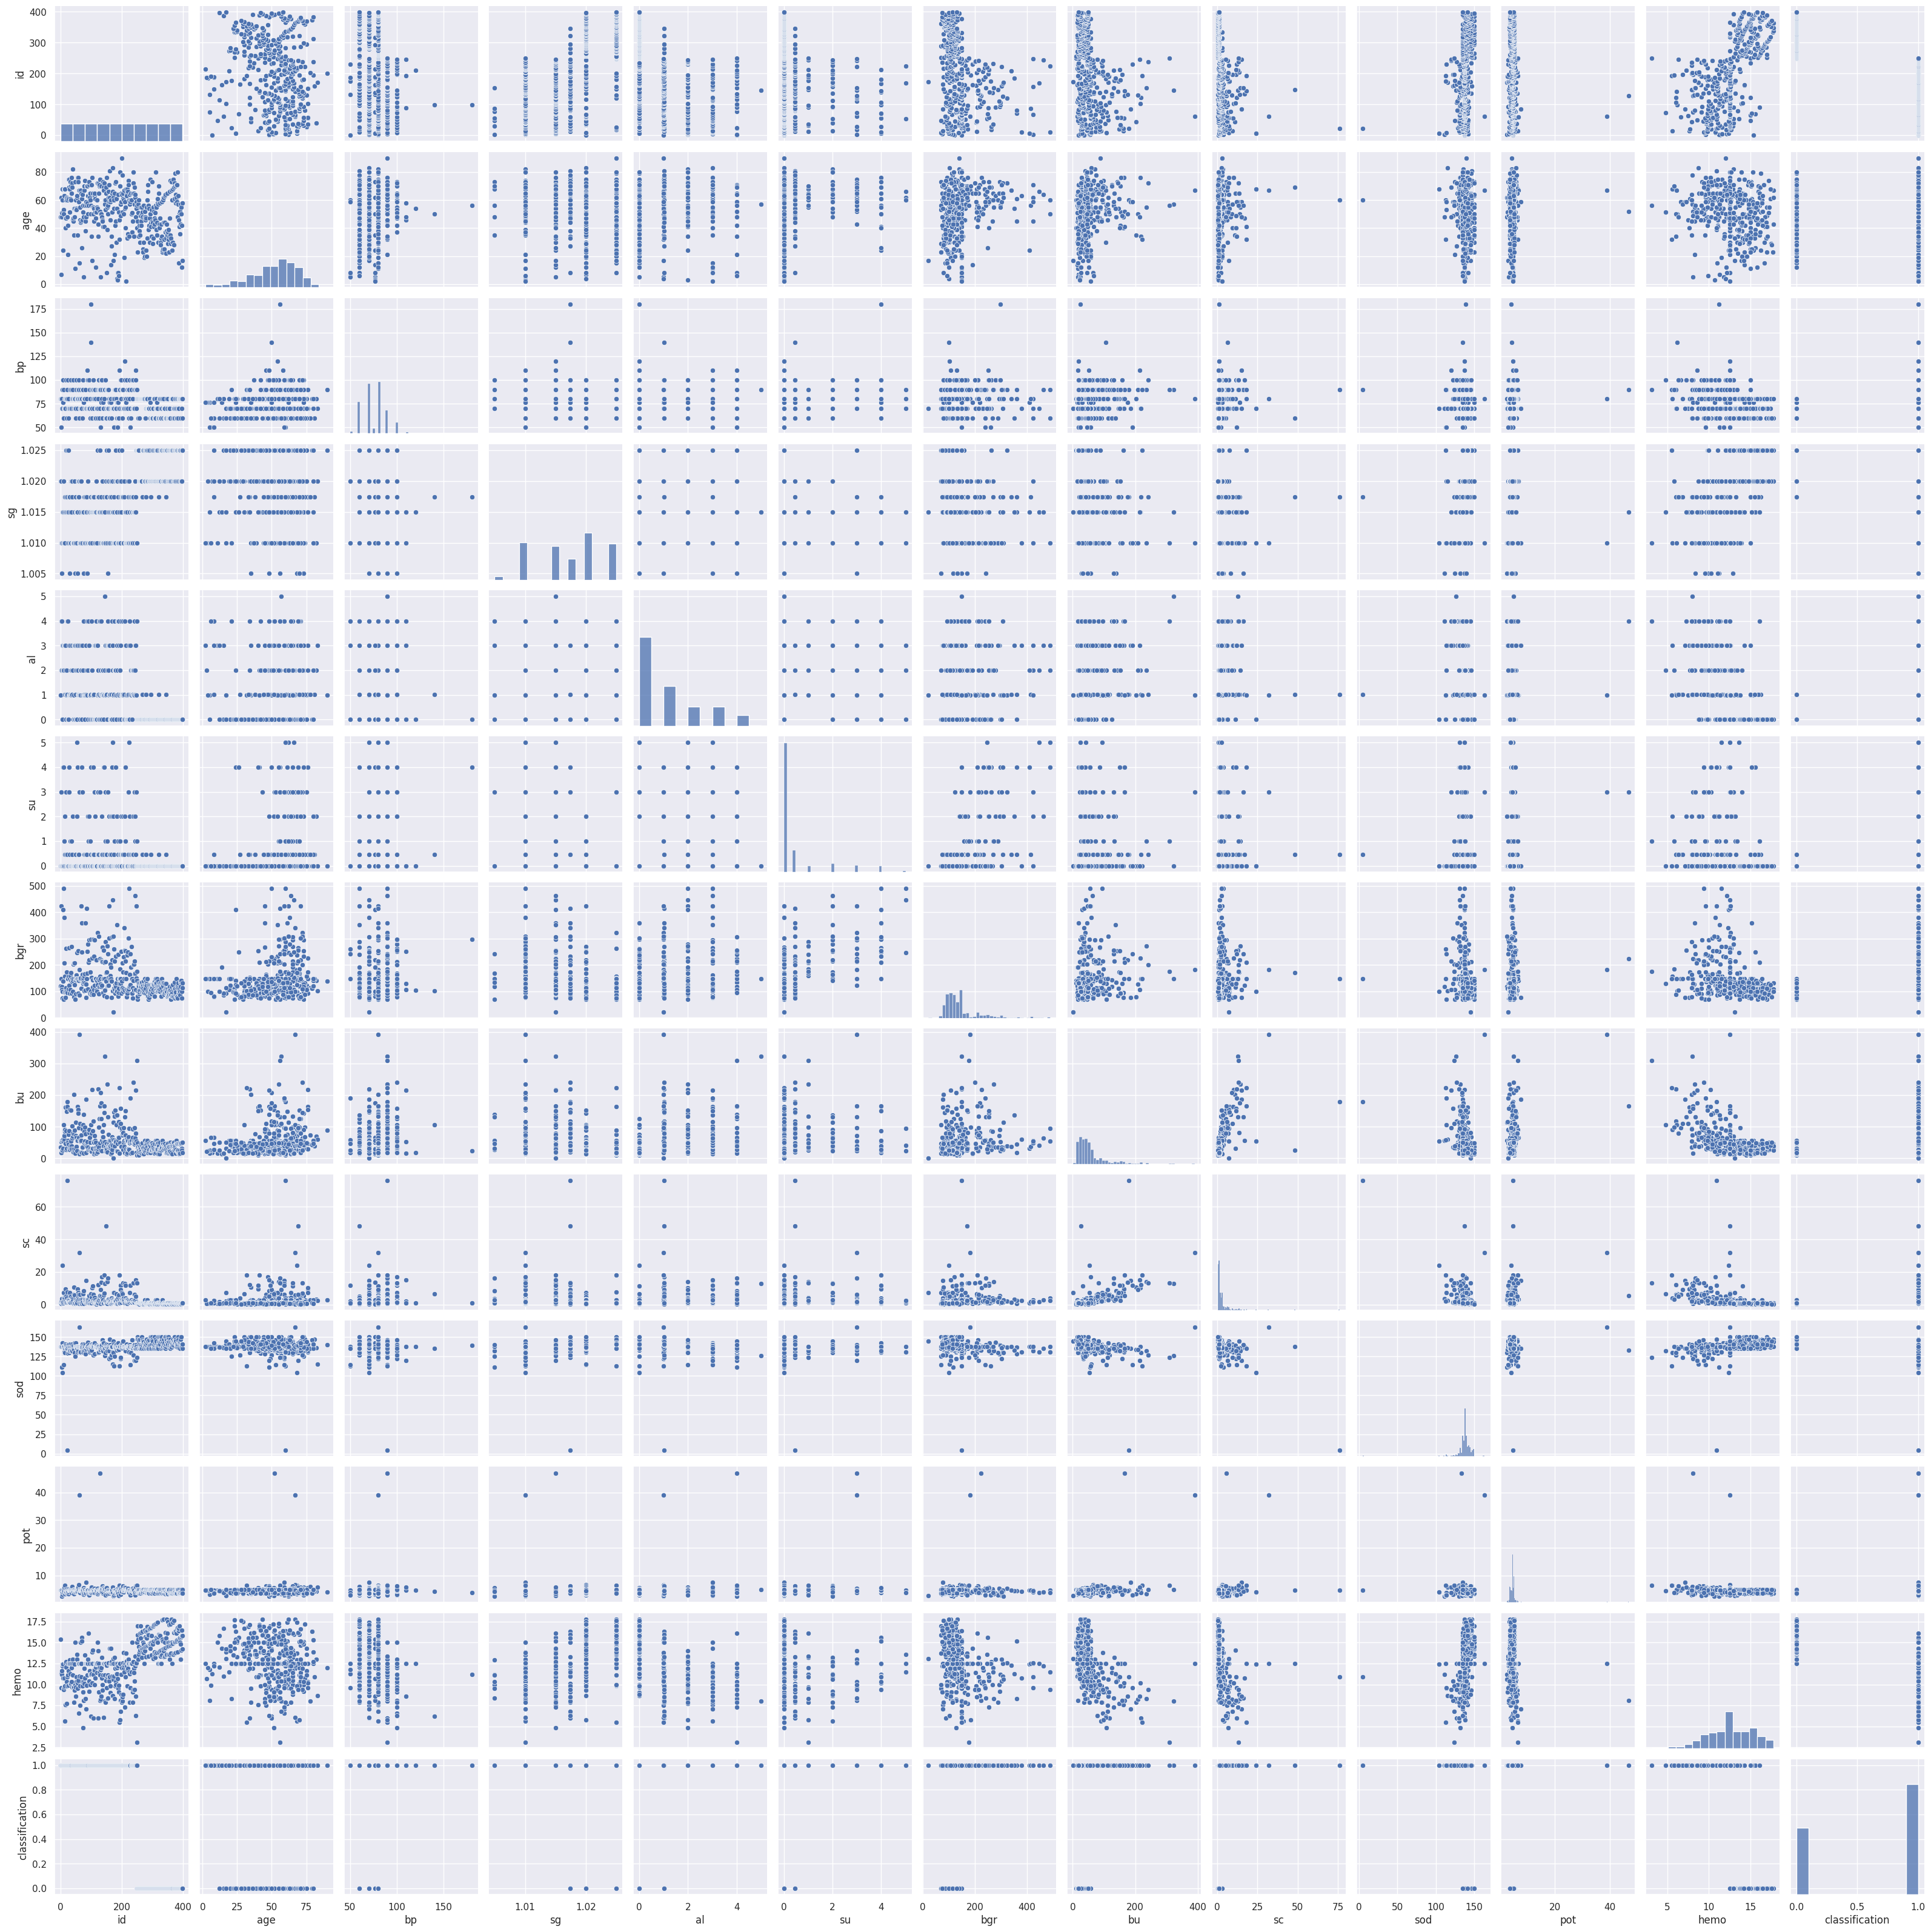

In [81]:
sns.pairplot(
    df
)  # All attributes are plotted against each other to see the pattern of distribution

Relationship between variables:

There is a notable positive correlation between bgr (blood glucose random) and su (sugar), with a correlation coefficient of approximately 0.64. This suggests that as the blood glucose level increases, the level of sugar in the urine also tends to increase.
A notable negative correlation exists between sc (serum creatinine) and sod (sodium), with a correlation coefficient of approximately -0.62. This indicates that higher serum creatinine levels are associated with lower sodium levels.
Distribution of variables:

The summary statistics indicate that variables such as age, bp (blood pressure), and bgr have a wide range of values and may have outliers.
hemo (hemoglobin) has a mean of approximately 12.53, with a standard deviation of 2.72, indicating a relatively normal distribution but with potential outliers on both the lower and higher ends.
Outliers:

Outlier counts for variables indicate that bgr, bu (blood urea), and sc have a higher number of outliers, suggesting significant variance from the median value.
Patterns and trends:

The correlation pairs identified (bgr with su, and sc with sod) may suggest specific patterns and trends that could be explored further for understanding the relationships between these variables.
Potential predictors:

Based on the correlation data, bgr and su could be potential predictors for each other, and similarly, sc could be a potential predictor for sod levels or vice versa.
To summarize, the data shows a mix of distributions and potential outliers that would need to be considered when preparing the data for machine learning models. Variables with strong correlations could serve as predictors, but the presence of outliers suggests that data preprocessing steps like normalization or standardization and outlier treatment might be necessary to improve model performance.

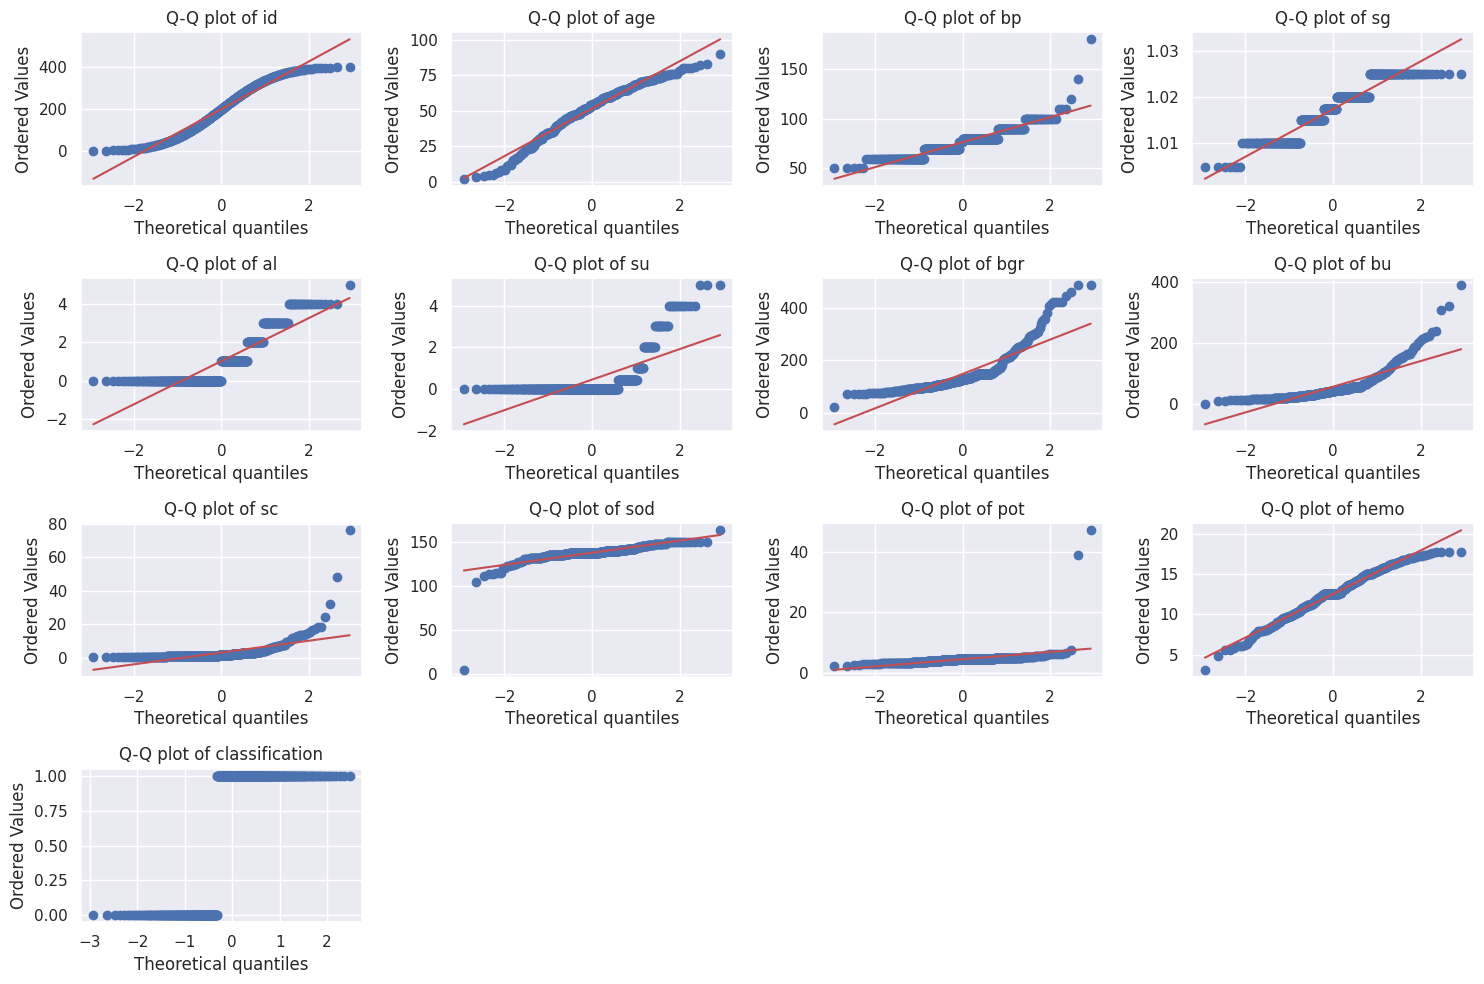

In [82]:
#likely distributions of the numeric variables
import scipy.stats as stats

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the number of rows and columns needed based on the number of numeric columns
num_numeric_columns = len(numeric_columns)
num_rows = (num_numeric_columns - 1) // 4 + 1
num_cols = min(num_numeric_columns, 4)

# Plotting Q-Q plots for numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i+1)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('Q-Q plot of ' + column)

plt.tight_layout()
plt.show()

Here's an interpretation of each Q-Q plot:

id: The plot shows a curve, indicating that the 'id' variable does not follow a normal distribution. This is expected as 'id' is likely a unique identifier for each observation.

age: It follows the line closely in the middle quantiles, suggesting a normal distribution in that range, but deviates at the tails, indicating potential outliers or a non-normal distribution in the tails.

bp: There is some deviation from the line, especially in the upper quantiles, suggesting the presence of outliers or a skew in the blood pressure distribution.

sg: The points lie close to the line, suggesting that the specific gravity values may be normally distributed.

al: There is a pronounced deviation from the line, indicating that albumin levels are not normally distributed and may have outliers or be skewed.

su: There is a noticeable deviation from the line, especially in the upper quantiles, indicating a non-normal distribution for sugar levels.

bgr: Blood glucose random levels show significant deviation from the line, indicating non-normality and potential outliers.

bu: Blood urea levels deviate from the line, particularly at higher quantiles, suggesting a skew in the distribution.

sc: Serum creatinine shows deviation from the normal line, particularly in the higher quantiles, indicating potential outliers or skewness.

sod: The plot for sodium levels shows a deviation, particularly in the lower quantiles, indicating a distribution that is not normal.

pot: Potassium levels have points that are fairly close to the line but with some deviation, suggesting a distribution that is not perfectly normal.

hemo: Hemoglobin levels show deviation from the line, especially in the upper quantiles, indicating a potential non-normal distribution.

classification: The Q-Q plot for the 'classification' variable is flat, which is consistent with a binary variable that takes on two values, typically encoded as 0 and 1.

Overall, most variables do not perfectly follow a normal distribution, with various degrees of skewness and outliers. This is common in clinical data, as many biological measures do not follow a normal distribution. When using these variables in statistical tests or models that assume normality, transformations or non-parametric methods might be required.

In [85]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('classification ~age + bp + al + su + bgr + bu + sc + pot + hemo + rbc + pc + pcc + ba + pcv + wc + rc + htn + dm + cad + appet + pe + ane', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         classification   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     8.883
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.44e-45
Time:                        00:37:30   Log-Likelihood:                 182.16
No. Observations:                 398   AIC:                             37.69
Df Residuals:                     197   BIC:                             839.0
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.2405      0.508      2.442      0.015       0.239       2.242
rbc[T.normal]     -0.0523      0.063     -0.834      0.405      -0.176       0.071
pc[T.normal]       0.0489      0.060      0.821      0.412      -0.069       0.166
pcc[T.present]    -0.0055      0.065     -0.085      0.932      -0.134       0.122
ba[T.present]      0.0125      0.079      0.157      0.875      -0.144       0.169
pcv[T.	?]          0.0455      0.233      0.196      0.845      -0.413       0.504
pcv[T.14]          0.0566      0.270      0.210      0.834      -0.476       0.589
pcv[T.15]          0.1391      0.246      0.565      0.573      -0.347       0.625
pcv[T.16]         -0.3035      0.443     -0.685      0.494      -1.177       0.570
pcv[T.17]         -0.1133      0.305     -0.371      0.711      -0.716       0.489
pcv[T.18]          0.0252      0.187      0.135      0.893      -0.344       0.395
pcv[T.19]         -0.0559      0.299     -0.187      0.852      -0.645       0.533
pcv[T.20]         -0.2180      0.273     -0.799      0.425      -0.756       0.320
pcv[T.21]          0.1702      0.237      0.719      0.473      -0.297       0.637
pcv[T.22]         -0.3576      0.666     -0.537      0.592      -1.670       0.955
pcv[T.23]         -0.1288      0.351     -0.367      0.714      -0.820       0.563
pcv[T.24]          0.1172      0.175      0.670      0.504      -0.228       0.462
pcv[T.25]          0.3776      0.186      2.033      0.043       0.011       0.744
pcv[T.26]          0.0810      0.181      0.448      0.654      -0.275       0.437
pcv[T.27]          0.1405      0.154      0.911      0.363      -0.164       0.445
pcv[T.28]          0.0185      0.099      0.187      0.852      -0.177       0.214
pcv[T.29]          0.0537      0.131      0.409      0.683      -0.205       0.313
pcv[T.30]          0.0982      0.134      0.732      0.465      -0.166       0.363
pcv[T.31]         -0.0254      0.116     -0.220      0.826      -0.254       0.203
pcv[T.32]          0.1314      0.091      1.450      0.149      -0.047       0.310
pcv[T.33]          0.1847      0.089      2.071      0.040       0.009       0.361
pcv[T.34]          0.3054      0.124      2.461      0.015       0.061       0.550
pcv[T.35]          0.3457      0.132      2.629      0.009       0.086       0.605
pcv[T.36]          0.2923      0.097      3.000      0.003       0.100       0.484
pcv[T.37]          0.2699      0.104      2.595      0.010       0.065       0.475
pcv[T.38]          0.3027      0.122      2.489      0.014       0.063       0.542
pcv[T.39]          0.1920      0.107      1.798      0.074      -0.019       0.403
pcv[T.40]          0.0615      0.096      0.640      0.523      -0.128       0.251
pcv[T.41]          0.1114      0.061      1.825      0.070      -0.009       0.232
pcv[T.42]   

In [126]:
# Assuming df_copy is your DataFrame from which you want to remove 'sg' and 'sod'

# Drop the 'sg' and 'sod' columns from the DataFrame
df_reduced = df_copy.drop(['sg', 'sod'], axis=1)

# Now, you can proceed with any further analysis using df_reduced


In [127]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure df_reduced only contains numeric columns for VIF calculation
numeric_df_reduced = df_reduced.select_dtypes(include=[np.number])

# Calculate the VIF on the numeric part of the DataFrame
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = numeric_df_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(numeric_df_reduced.values, i) for i in range(numeric_df_reduced.shape[1])]

# Display the VIF values for the reduced DataFrame
print(vif_data_reduced)


          Feature        VIF
0             age  10.970049
1              bp  27.195290
2              al   2.807762
3              su   2.028659
4             bgr   8.840098
5              bu   4.744706
6              sc   1.998283
7             pot   4.312656
8            hemo  19.443037
9  classification   6.118477


In [128]:
import statsmodels.formula.api as smf

# Define the model formula without 'bp' and 'pot'
model_formula = 'classification ~ age + al + su + bgr + bu + sc + hemo + rbc + pc + pcc + ba + pcv + wc + rc + htn + dm + cad + appet + pe + ane'

# Fit the OLS model with the updated formula
results_updated = smf.ols(model_formula, data=df).fit()

# Display the summary of the new model
print(results_updated.summary())


                            OLS Regression Results                            
Dep. Variable:         classification   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     9.115
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           4.12e-47
Time:                        01:25:25   Log-Likelihood:                 177.75
No. Observations:                 398   AIC:                             36.50
Df Residuals:                     202   BIC:                             817.8
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1830      0.457      2.

In [132]:
# Define the model formula, excluding 'pcc[T.present]', 'ba[T.present]', 'pcv[T. ?]', and 'wc[T. ?]'
model_formula_updated = 'classification ~ age + al + su + bgr + bu + sc + hemo + rbc + pc + pcv + wc + rc + htn + dm + cad + appet + pe + ane - 1'

# Fit the OLS model with the updated formula
results_final = smf.ols(model_formula_updated, data=df).fit()

# Display the summary of the new model
print(results_final.summary())


                            OLS Regression Results                            
Dep. Variable:         classification   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     9.299
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           4.45e-48
Time:                        01:37:21   Log-Likelihood:                 177.73
No. Observations:                 398   AIC:                             32.54
Df Residuals:                     204   BIC:                             805.9
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
rbc[abnormal]     1.1678      0.436      2.680

In [ ]:
#After exploring various model simplifications and observing the decrease in the R-squared value, it's understandable to decide against further feature removal. This decision reflects a careful balance between model complexity, interpretability, and predictive power. Here's an explanation considering your decision:

Model Simplification and Feature Selection
In the process of simplifying your OLS regression model, you aimed to reduce complexity by removing features that seemed to contribute less to the model, based on statistical significance (p-values) and multicollinearity considerations. This approach is generally sound, as it can lead to a more interpretable and parsimonious model, which is easier to understand and explain.

Impact on R-squared
The R-squared value, which indicates the proportion of variance in the dependent variable that's predictable from the independent variables, decreased in the simplified model. While a higher R-squared value is often desirable, it's not the sole criterion for a good model. An overly complex model might have a high R-squared value but could suffer from overfitting, where the model fits the training data well but generalizes poorly to new, unseen data.

Decision Against Further Feature Removal
Your decision to halt further feature removal after noticing a drop in the R-squared value is a prudent one, especially if the removed features are theoretically important or contribute to the model's predictive accuracy on new data. It's essential to maintain a balance between achieving a simple model and retaining enough complexity to capture the underlying relationships in the data effectively.

Final Model Considerations
Statistical Significance: The final model includes variables that are statistically significant, indicating a strong evidence of their association with the dependent variable.
Multicollinearity: Although multicollinearity was a concern, addressing it by removing variables can sometimes lead to the exclusion of important predictors. It's crucial to weigh the impact of multicollinearity against the importance of each variable's contribution to the model.
Model Validation: It's advisable to validate the final model using techniques such as cross-validation to assess its predictive performance on unseen data, ensuring it's not just tailored to the training dataset.
Interpretability: The simpler model, though slightly less predictive in terms of R-squared, may offer better interpretability, making it easier to understand and communicate the key drivers behind the dependent variable.

In [136]:
df_en = df.copy()

# Perform one-hot encoding on categorical variables in the copied DataFrame
categorical_vars = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']
df_en_encoded = pd.get_dummies(df_en, columns=categorical_vars, drop_first=True)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


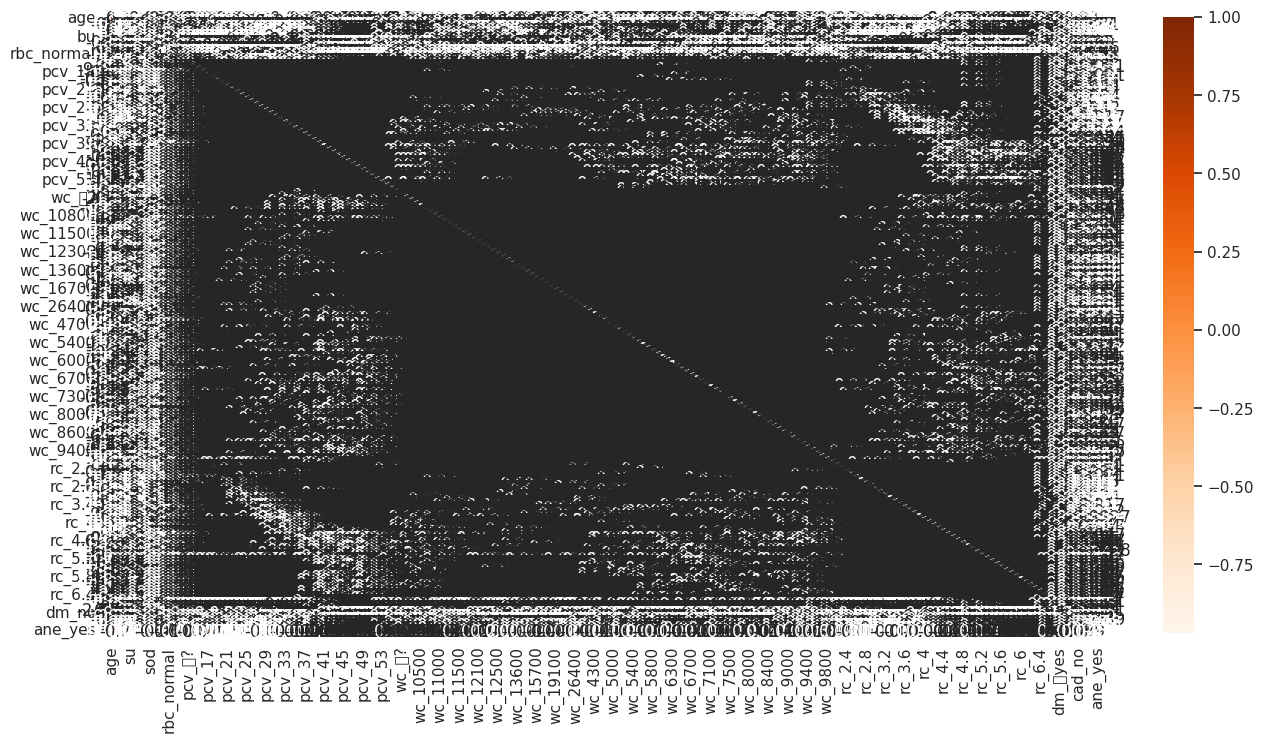

In [138]:
sns.heatmap(
    df_encoded.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

<Axes: >

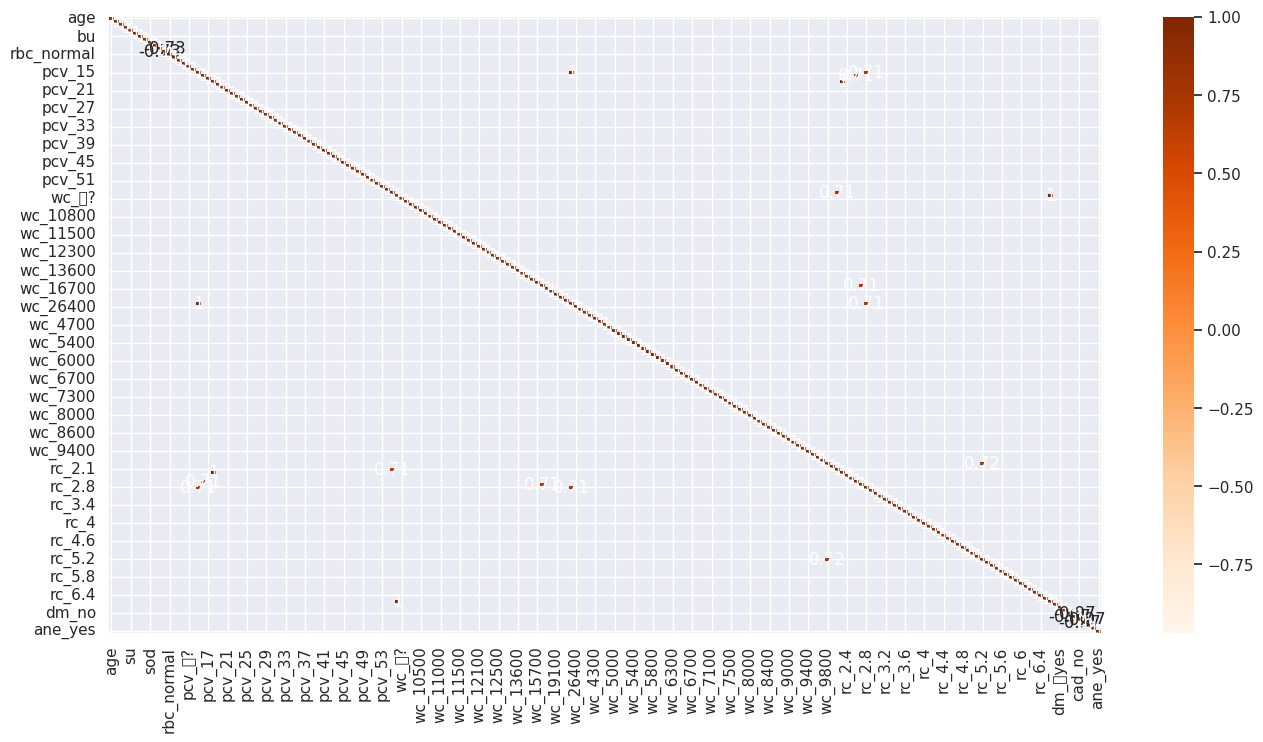

In [139]:
correlation_matrix = df_encoded.corr()
high_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
sns.heatmap(high_corr, annot=True, cmap="Oranges")


The updated heatmap seems to be a filtered version showing only the significant correlations (either positive or negative). This approach has successfully decluttered the heatmap, making it easier to identify the most relevant relationships between variables.


Significant Correlations: The presence of some annotated correlations, such as -0.7, indicates strong negative correlations between certain variables. It's important to investigate these to understand if one variable can predict the other or if there is a causal relationship.

Data Interpretation: For the variables with significant correlations, you would need to interpret these findings within the context of your domain knowledge. For instance, if hemo (hemoglobin levels) has a strong negative correlation with the classification outcome, it may suggest that lower hemoglobin levels are associated with a higher likelihood of a particular classification.

Sparse Annotations: The heatmap has been simplified to only show significant correlations, which helps focus on the most critical relationships without being overwhelmed by a large number of less relevant ones.

Multicollinearity: If the variables with strong correlations are independent variables in the same regression model, multicollinearity might be a concern. It may be wise to consider combining correlated variables or removing one from the model.

Further Analysis: Depending on the goal of your analysis, you may wish to further investigate the variables with strong correlations. For example, if you're building a predictive model, variables with high correlations to the target variable could be good predictors. If you're interested in understanding the underlying structure of the data, these correlations might suggest avenues for deeper investigation.

Numerical Stability: The absence of clutter in the heatmap suggests that the numerical stability of the model may have improved. However, the notes from the regression output about the condition number suggest that there may still be underlying multicollinearity or numerical issues to explore.

Actionable Insights: From a practical standpoint, focusing on the variables with the strongest correlations can lead to actionable insights, as they likely represent the most significant factors in your dataset.


In [142]:
import h2o
from h2o.automl import H2OAutoML

# Initialize the H2O cluster
h2o.init()

# Assuming 'df' is your Pandas DataFrame with the actual data
# Convert the pandas DataFrame to an H2OFrame
h2o_df = h2o.H2OFrame(df)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0yqxcixr
  JVM stdout: /tmp/tmp0yqxcixr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0yqxcixr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_tjjd0f
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [143]:
h2o_df.types

{'age': 'real',
 'bp': 'real',
 'sg': 'real',
 'al': 'real',
 'su': 'real',
 'rbc': 'enum',
 'pc': 'enum',
 'pcc': 'enum',
 'ba': 'enum',
 'bgr': 'real',
 'bu': 'real',
 'sc': 'real',
 'sod': 'real',
 'pot': 'real',
 'hemo': 'real',
 'pcv': 'int',
 'wc': 'int',
 'rc': 'real',
 'htn': 'enum',
 'dm': 'enum',
 'cad': 'enum',
 'appet': 'enum',
 'pe': 'enum',
 'ane': 'enum',
 'classification': 'int'}

In [145]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df1_train, df1_test = h2o_df.split_frame([pct_rows])

In [146]:
print(df1_train.shape)
print(df1_test.shape)

(319, 25)
(81, 25)


In [147]:
df1_train.head()

age        bp     sg    al    su  rbc       pc        pcc         ba              bgr    bu    sc      sod      pot    hemo    pcv     wc    rc  htn    dm    cad    appet    pe    ane      classification
-----  --------  -----  ----  ----  --------  --------  ----------  ----------  -------  ----  ----  -------  -------  ------  -----  -----  ----  -----  ----  -----  -------  ----  -----  ----------------
   48   80       1.02      1     0  normal    normal    notpresent  notpresent  121        36   1.2  137.529  4.62724    15.4     44   7800   5.2  yes    yes   no     good     no    no                    1
    7   50       1.02      4     0  normal    normal    notpresent  notpresent  148.037    18   0.8  137.529  4.62724    11.3     38   6000   5.2  no     no    no     good     no    no                    1
   62   80       1.01      2     3  normal    normal    notpresent  notpresent  423        53   1.8  137.529  4.62724     9.6     31   7500   5.2  no     yes   no     poor     no    yes                   1
   48   70       1.005     4     0  normal    abnormal  present     notpresent  117        56   3.8  111      2.5        11.2     32   6700   3.9  yes    no    no     poor     yes   yes                   1
   51   80       1.01      2     0  normal    normal    notpresent  notpresent  106        26   1.4  137.529  4.62724    11.6     35   7300   4.6  no     no    no     good     no    no                    1
   60   90       1.015     3     0  normal    normal    notpresent  notpresent   74        25   1.1  142      3.2        12.2     39   7800   4.4  yes    yes   no     good     yes   no                    1
   68   70       1.01      0     0  normal    normal    notpresent  notpresent  100        54  24    104      4          12.4     36   9800   5.2  no     no    no     good     no    no                    1
   24   76.4691  1.015     2     4  normal    abnormal  notpresent  notpresent  410        31   1.1  137.529  4.62724    12.4     44   6900   5    no     yes   no     good     yes   no                    1
   52  100       1.015     3     0  normal    abnormal  present     notpresent  138        60   1.9  137.529  4.62724    10.8     33   9600   4    yes    yes   no     good     no    yes                   1
   53   90       1.02      2     0  abnormal  abnormal  present     notpresent   70       107   7.2  114      3.7         9.5     29  12100   3.7  yes    yes   no     poor     no    yes                   1
[10 rows x 25 columns]

In [148]:
X = h2o_df.columns
print(X)

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [149]:
# Set target and predictor variables
y = "classification"

In [150]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [151]:
aml.train(x=X, y=y, training_frame=df1_train)  # Trainig the dataset on different models

AutoML progress: |
02:17:20.938: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
02:17:21.407: XGBoost_1_AutoML_1_20240220_21719 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_1_20240220_21719_cv_1.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.

02:17:21.434: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
02:17:24.69: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target co

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_5_AutoML_1_20240220_21719


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       1/5
# GBM base models (used / total)           1/1
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  0/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GBM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegression: stackedensemble
** Reported on train data. **

MSE: 6.248990646884551e-06
RMSE: 0.0024997981212259023
MAE: 0.002424947677072914
RMSLE: 0.0021125533308870145
Mean Residual Deviance: 6.248990646884551e-06

ModelMetricsRegression: stackedensemble
** Reported on cross-validation data. **

MSE: 6.467344842890546e-06
RMSE: 0.002543097489851804
MAE: 0.0024626276565045606
RMSLE: 0.002147739289564262
Mean Residual Deviance: 6.467344842890546e-06

Cross-Validation Metrics Summary: 
                        mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.00246133  0.000136886  0.00243591    0.00236005    0.00248684    0.00234123    0.00268263
mean_residual_deviance  6.4608e-06  9.31463e-07  6.32254e-06   5.71638e-06   6.66256e-06   5.65568e-06   7.94684e-06
mse                     6.4608e-06  9.31463e-07  6.32254e-06   5.71638e-06   6.66256e-06   5.65568e-06   7.94684e-06
r2                      0.999971    2.34758e-06  0.999973      0.99997       0.999973      0.99997       0.999968
residual_deviance       6.4608e-06  9.31463e-07  6.32254e-06   5.71638e-06   6.66256e-06   5.65568e-06   7.94684e-06
rmse                    0.00253675  0.00017928   0.00251447    0.0023909     0.00258119    0.00237817    0.00281901
rmsle                   0.00212278  0.000361609  0.00214298    0.00177586    0.00226984    0.00178569    0.00263952

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [152]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     rmse          mse         mae       rmsle    mean_residual_deviance
------------------------------------------------------  ---------  -----------  ----------  ----------  ------------------------
StackedEnsemble_BestOfFamily_5_AutoML_1_20240220_21719  0.0025431  6.46734e-06  0.00246263  0.00214774               6.46734e-06
StackedEnsemble_AllModels_5_AutoML_1_20240220_21719     0.0572936  0.00328256   0.0236532   0.0416379                0.00328256
StackedEnsemble_BestOfFamily_4_AutoML_1_20240220_21719  0.0923857  0.00853511   0.0489739   0.0652632                0.00853511
GBM_grid_1_AutoML_1_20240220_21719_model_8              0.0933751  0.00871891   0.0410758   0.0653249                0.00871891
GBM_grid_1_AutoML_1_20240220_21719_model_40             0.0951693  0.0090572    0.0348864   0.0669059                0.0090572
GBM_grid_1_AutoML_1_20240220_21719_model_53             0.0965727  0.00932629   0.0406157   0.068512                 0.00932629
GBM_grid_1_AutoML_1_20240220_21719_model_17             0.0971978  0.00944741   0.0403607   0.0684932                0.00944741
GBM_grid_1_AutoML_1_20240220_21719_model_47             0.100955   0.010192     0.0381156   0.070682                 0.010192
StackedEnsemble_AllModels_2_AutoML_1_20240220_21719     0.105742   0.0111814    0.0512897   0.0754022                0.0111814
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_21719  0.107877   0.0116374    0.0514741   0.0761455                0.0116374
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_21719  0.108114   0.0116887    0.0522539   0.0783659                0.0116887
DRF_1_AutoML_1_20240220_21719                           0.109232   0.0119317    0.0430775   0.0784524                0.0119317
GBM_grid_1_AutoML_1_20240220_21719_model_12             0.109885   0.0120748    0.0447339   0.0799983                0.0120748
GBM_grid_1_AutoML_1_20240220_21719_model_2              0.110546   0.0122203    0.0447325   0.0795761                0.0122203
StackedEnsemble_AllModels_1_AutoML_1_20240220_21719     0.111434   0.0124176    0.0539925   0.0812024                0.0124176
GBM_grid_1_AutoML_1_20240220_21719_model_45             0.111656   0.0124671    0.0620957   0.0796611                0.0124671
GBM_grid_1_AutoML_1_20240220_21719_model_13             0.111779   0.0124946    0.0533779   0.0771891                0.0124946
GBM_5_AutoML_1_20240220_21719                           0.114989   0.0132226    0.0425551   0.0770019                0.0132226
GBM_grid_1_AutoML_1_20240220_21719_model_9              0.115629   0.0133701    0.0632658   0.0859598                0.0133701
GBM_grid_1_AutoML_1_20240220_21719_model_21             0.116693   0.0136172    0.0518456   0.080401                 0.0136172
StackedEnsemble_AllModels_4_AutoML_1_20240220_21719     0.117371   0.013776     0.0815027   0.0879955                0.013776
StackedEnsemble_AllModels_3_AutoML_1_20240220_21719     0.117708   0.0138551    0.0814491   0.0883985                0.0138551
GBM_grid_1_AutoML_1_20240220_21719_model_42             0.117957   0.0139137    0.0533472   0.0874051                0.0139137
GBM_grid_1_AutoML_1_20240220_21719_model_33             0.119826   0.0143583    0.0595178   0.08472                  0.0143583
GBM_grid_1_AutoML_1_20240220_21719_model_46             0.120851   0.0146049    0.061962    0.0895905                0.0146049
GBM_grid_1_AutoML_1_20240220_21719_model_15             0.121308   0.0147156    0.0750001   0.0874913                0.0147156
GBM_grid_1_AutoML_1_20240220_21719_model_41             0.122341   0.0149674    0.0660529   0.0895283                0.0149674
GBM_grid_1_AutoML_1_20240220_21719_model_37             0.123027   0.0151358    0.0608214   0.0915103                0.0151358
GBM_grid_1_AutoML_1_20240220_21719_model_24             0.12311    0.0151561    0.0715119   0.0901179                0.0151561
GBM_grid_1_AutoML_1_20240220_21719_model_44           

In [157]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_5_AutoML_1_20240220_21719


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       1/5
# GBM base models (used / total)           1/1
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  0/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GBM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegression: stackedensemble
** Reported on train data. **

MSE: 6.248990646884551e-06
RMSE: 0.0024997981212259023
MAE: 0.002424947677072914
RMSLE: 0.0021125533308870145
Mean Residual Deviance: 6.24899064

In [159]:
best_model.algo

'stackedensemble'

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

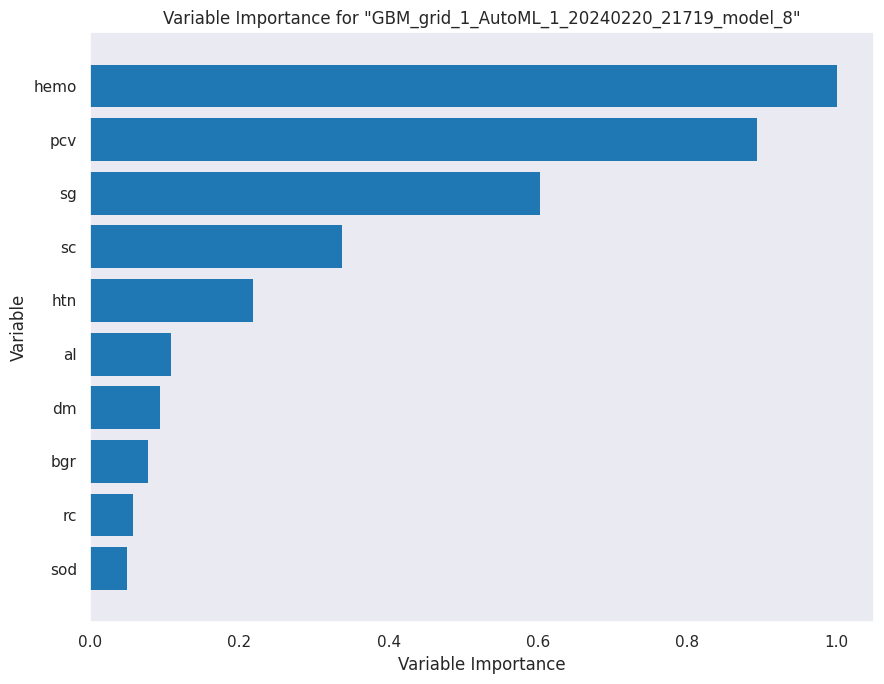

In [160]:
explain_model = aml.explain(frame = df1_test, figsize = (9,7),include_explanations=['varimp'])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
GLM model index: 79
GLM model algorithm: glm


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


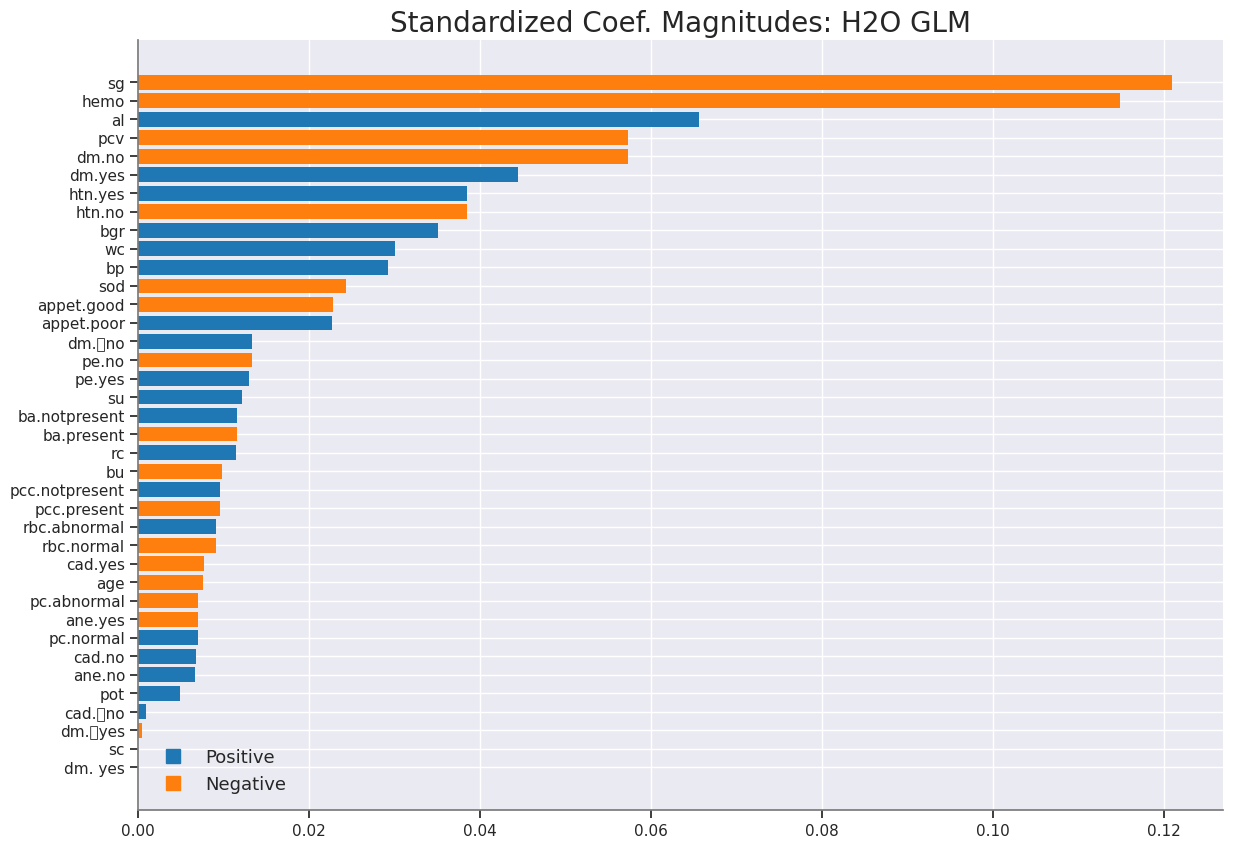

In [162]:
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
glm_index = next((index for index, model_id in enumerate(model_ids) if "GLM" in model_id), None)

# If a GLM model is found in the leaderboard
if glm_index is not None:
    print("GLM model index:", glm_index)
    glm_model = h2o.get_model(model_ids[glm_index])
    print("GLM model algorithm:", glm_model.algo)

    # Plotting the standardized coefficients for the GLM model
    glm_model.std_coef_plot()
else:
    print("No GLM model found in the leaderboard.")

In [163]:
print(best_model.rmse(train=True))

0.0024997981212259023


In [167]:
predictions = best_model.predict(df1_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [168]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
     predict
0   0.998049
1   0.998049
2   0.998049
3   0.998049
4   0.998049
..       ...
76  0.003203
77  0.003203
78  0.003203
79  0.003203
80  0.003203

[81 rows x 1 columns]


In [169]:
y_test = h2o.as_list(df1_test[y])  # Real Answers
y_test

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


classification
0                1
1                1
2                1
3                1
4                1
..             ...
76               0
77               0
78               0
79               0
80               0

[81 rows x 1 columns]

In [175]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

kidney_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
kidney_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
kidney_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
kidney_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [177]:
glm_model.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708395176638_32


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.0719 )  38                            9                              1                       py_2_sid_b49b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06754551410820453
RMSE: 0.2598951983169457
MAE: 0.22319024306742336
RMSLE: 0.1779280213942711
Mean Residual Deviance: 0.06754551410820453
R^2: 0.7128772771903823
Null degrees of freedom: 316
Residual degrees of freedom: 307
Null deviance: 74.57413249211358
Residual deviance: 21.411927972300838
AIC: 67.30673084883034

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  -------------------  ------------------
    2024-02-20 02:59:02  0.000 sec   0             74.57413249211358          0.2337747100066256
    2024-02-20 02:59:02  0.010 sec   1                                                            0.2598951983169457  0.06754551410820453  0.22319024306742336  0.7128772771903823

Variable Importances: 
variable    relative_importance     scaled_importance      percentage
----------  ----------------------  ---------------------  ---------------------
hemo        0.1600852608680725      1.0                    0.3334292204288318
sg          0.140584334731102       0.8781841249392636     0.29281224817147444
al          0.062248412519693375    0.38884537016179627    0.12965240864040825
dm.no       0.04347199574112892     0.2715552668958982     0.0905444609444427
bgr         0.03451277315616608     0.21558994856252456    0.0718839884814945
pcv         0.03003295511007309     0.18760599787399215    0.06255332161889827
bp          0.007676526438444853    0.04795273716529804    0.015988843770453995
wc          0.0011426409473642707   0.007137702379146134   0.0023799185399317135
sod         0.00036277182516641915  0.0022661163382516657  0.0007555894040642918
dm.	no             0.0                     0.0                    0.0
---         ---                     ---                    ---
pe.no       0.0                     0.0                    0.0
pe.yes      0.0                     0.0                    0.0
ane.no      0.0                     0.0                    0.0
ane.yes     0.0                     0.0                    0.0
age         0.0                     0.0                    0.0
su          0.0                     0.0                    0.0
bu          0.0                     0.0                    0.0
sc          0.0                     0.0                    0.0
pot         0.0                     0.0                    0.0
rc          0.0                     0.0                    0.0
[38 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [178]:
kidney_glm_regularization_ridge.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708395176638_33


GLM Model: summary
    family    link      regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.03595 )  38                            37                             1                       py_2_sid_b49b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.05624961465539166
RMSE: 0.23717001213347286
MAE: 0.19611146425119197
RMSLE: 0.1536311795485951
Mean Residual Deviance: 0.05624961465539166
R^2: 0.7608939286334327
Null degrees of freedom: 316
Residual degrees of freedom: 279
Null deviance: 74.57413249211358
Residual deviance: 17.831127845759156
AIC: 65.29494999983405

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.08643663002650998
RMSE: 0.29400107147170396
MAE: 0.2215757548970918
RMSLE: 0.16987625471173742
Mean Residual Deviance: 0.08643663002650998
R^2: 0.6325748513225906
Null degrees of freedom: 316
Residual degrees of freedom: 279
Null deviance: 74.76310883560238
Residual deviance: 27.400411718403664
AIC: 201.48206625424183

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.220832   0.0171512  0.220094      0.240445      0.207376      0.23538       0.200864
mean_residual_deviance  0.0863022  0.0418137  0.0715656     0.159799      0.0618208     0.0788534     0.0594726
mse                     0.0863022  0.0418137  0.0715656     0.159799      0.0618208     0.0788534     0.0594726
null_deviance           14.9526    1.88213    16.7329       15.2412       12.5022       16.6989       13.5879
r2                      0.634035   0.16419    0.696328      0.343733      0.716564      0.672978      0.740571
residual_deviance       5.48008    2.63255    5.08116       9.90752       3.46196       5.44089       3.50888
rmse                    0.288116   0.0641399  0.267517      0.399748      0.248638      0.280809      0.24387
rmsle                   0.168957   0.0147983  0.163927      0.189961      0.156731      0.178332      0.155836

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse        training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -------------------  -------------------  -------------------  ------------------
    2024-02-20 02:59:08  0.000 sec   0             74.57413249211358          0.2337747100066256
    2024-02-20 02:59:08  0.006 sec   1                                                            0.23717001213347286  0.05624961465539166  0.19611146425119197  0.7608939286334327

Variable Importances: 
variable      relative_importance    scaled_importance     percentage
------------  ---------------------  --------------------  ---------------------
hemo          0.1540326327085495     1.0                   0.12511787927515255
sg            0.13757379353046417    0.8931470631341628    0.11174866642017725
dm.no         0.08552239835262299    0.5552225969833476    0.06946827386019917
al            0.07292068004608154    0.4734105933517172    0.059232129466558495
dm.	no               0.05802755057811737    0.3767224487288568    0.04713471386029696
htn.no        0.04748313128948212    0.3082666994293774    0.038569675683754585
htn.yes       0.04748313128948212    0.3082666994293774    0.038569675683754585
pcv           0.04742532595992088    0.3078914196685581    0.

In [179]:
kidney_glm_regularization_lasso.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708395176638_34


GLM Model: summary
    family    link      regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 0.03595 )  38                            7                              1                       py_2_sid_b49b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06712659374493625
RMSE: 0.25908800386149927
MAE: 0.2211857493180024
RMSLE: 0.17685412973453454
Mean Residual Deviance: 0.06712659374493625
R^2: 0.7146580254299959
Null degrees of freedom: 316
Residual degrees of freedom: 309
Null deviance: 74.57413249211358
Residual deviance: 21.27913021714479
AIC: 61.33456028427696

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.07215276779691633
RMSE: 0.2686126724428993
MAE: 0.23078933648447306
RMSLE: 0.1850778566036692
Mean Residual Deviance: 0.07215276779691633
R^2: 0.6932927460598848
Null degrees of freedom: 316
Residual degrees of freedom: 309
Null deviance: 74.94799518610931
Residual deviance: 22.872427391622477
AIC: 84.2236564559293

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.2302     0.0123445  0.227335      0.251688      0.227248      0.22035       0.224379
mean_residual_deviance  0.0716141  0.0061235  0.0710311     0.0806349     0.0740963     0.0650384     0.0672699
mse                     0.0716141  0.0061235  0.0710311     0.0806349     0.0740963     0.0650384     0.0672699
null_deviance           14.9896    3.34948    18.4401       15.7714       17.6406       10.6422       12.4536
r2                      0.687793   0.0243498  0.705896      0.662264      0.695147      0.661963      0.713695
residual_deviance       4.57449    1.07043    5.39836       5.32191       5.33493       3.25192       3.56531
rmse                    0.267415   0.0113566  0.266517      0.283963      0.272206      0.255026      0.259364
rmsle                   0.183291   0.0132558  0.188397      0.198059      0.188         0.162802      0.179199

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse        training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -------------------  -------------------  ------------------  ------------------
    2024-02-20 02:59:36  0.000 sec   0             74.57413249211358          0.2337747100066256
    2024-02-20 02:59:36  0.004 sec   1                                                            0.25908800386149927  0.06712659374493625  0.2211857493180024  0.7146580254299959

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  --------------------
hemo        0.1758364886045456     1.0                  0.3629294892712448
sg          0.1454649418592453     0.8272739237098531   0.30024210261943574
al          0.06070065125823021    0.3452107792868028   0.12528717181748777
dm.no       0.0463235005736351     0.2634464606365984   0.09561248940915776
bgr         0.033503323793411255   0.1905368109844361   0.0691514274979531
pcv         0.016420183703303337   0.09338325528231035  0.03389153714609517
bp          0.00624306034296751    0.03550491932882081  0.012885782238625684
dm.	no             0.0                    0.0                  0.0
dm.	yes             0.0                   

In [180]:
lambda_search = kidney_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df1_train
)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


In [181]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708395176638_35


GLM Model: summary
    family    link      regularization                              lambda_search                                                             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------------------------  ------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.719 )  nlambda = 100, lambda.max = 0.719, lambda.min = 0.719, lambda.1se = -1.0  38                            0                              1                       py_2_sid_b49b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.23524962931266113
RMSE: 0.4850253903793709
MAE: 0.47049925862532027
RMSLE: 0.34027843117246026
Mean Residual Deviance: 0.23524962931266113
R^2: 1.1102230246251565e-16
Null degrees of freedom: 316
Residual degrees of freedom: 316
Null deviance: 74.57413249211358
Residual deviance: 74.57413249211358
AIC: 444.87376988541763

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse       training_deviance    training_mae         training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  ------------------  -------------------  -------------------  ----------------------
     2024-02-20 03:00:10  0.000 sec   1            .72E0     1             0.23377471000662559  0.5
     2024-02-20 03:00:10  0.005 sec   2            .69E0     3             nan                  0.5
     2024-02-20 03:00:10  0.010 sec   3            .66E0     3             nan                  0.5
     2024-02-20 03:00:10  0.011 sec   4            .63E0     3             nan                  0.5
     2024-02-20 03:00:10  0.015 sec   5            .6E0      3             nan                  0.5
     2024-02-20 03:00:10  0.016 sec   6            .57E0     3             nan                  0.5
     2024-02-20 03:00:10  0.016 sec   7            .54E0     3             nan                  0.5
     2024-02-20 03:00:10  0.017 sec   8            .52E0     3             nan                  0.5
     2024-02-20 03:00:10  0.018 sec   9            .5E0      3             nan                  0.5
     2024-02-20 03:00:10  0.018 sec   10           .47E0     3             nan                  0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                 ---                  ---                  ---
     2024-02-20 03:00:10  0.116 sec   91           .11E-1    3             nan                  0.5
     2024-02-20 03:00:10  0.120 sec   92           .1E-1     3             nan                  0.5
     2024-02-20 03:00:10  0.121 sec   93           .1E-1     3             nan                  0.5
     2024-02-20 03:00:10  0.121 sec   94           .95E-2    3             nan                  0.5
     2024-02-20 03:00:10  0.122 sec   95           .91E-2    3             nan                  0.5
     2024-02-20 03:00:10  0.122 sec   96           .87E-2    3             nan                  0.5
     2024-02-20 03:00:10  0.123 sec   97           .83E-2    3             nan                  0.5
     2024-02-20 03:00:10  0.123 sec   98           .79E-2    3             nan                  0.5
     2024-02-20 03:00:10  0.124 sec   99           .75E-2    3             nan                  0.5
     2024-02-20 03:00:10  0.125 sec   100          .72E-2    3             nan                  0.5      100           0.4850253903793709  0.23524962931266113  0.47049925862532027  1.1102230246251565e-16
[100 rows x 13 column

In [183]:
coeff_table = glm_model._model_json["output"]["coefficients_table"]

In [184]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

names  coefficients  standardized_coefficients
0        Intercept  2.813757e+01                   0.650428
1          dm.\tno  0.000000e+00                   0.000000
2         dm.\tyes  0.000000e+00                   0.000000
3          dm. yes  0.000000e+00                   0.000000
4            dm.no -4.347200e-02                  -0.043472
5           dm.yes  0.000000e+00                   0.000000
6         cad.\tno  0.000000e+00                   0.000000
7           cad.no  0.000000e+00                   0.000000
8          cad.yes  0.000000e+00                   0.000000
9   pcc.notpresent  0.000000e+00                   0.000000
10     pcc.present  0.000000e+00                   0.000000
11   ba.notpresent  0.000000e+00                   0.000000
12      ba.present  0.000000e+00                   0.000000
13          htn.no  0.000000e+00                   0.000000
14         htn.yes  0.000000e+00                   0.000000
15    rbc.abnormal  0.000000e+00                   0.000000
16      rbc.normal  0.000000e+00                   0.000000
17     pc.abnormal  0.000000e+00                   0.000000
18       pc.normal  0.000000e+00                   0.000000
19      appet.good  0.000000e+00                   0.000000
20      appet.poor  0.000000e+00                   0.000000
21           pe.no  0.000000e+00                   0.000000
22          pe.yes  0.000000e+00                   0.000000
23          ane.no  0.000000e+00                   0.000000
24         ane.yes  0.000000e+00                   0.000000
25             age  0.000000e+00                   0.000000
26              bp  6.303119e-04                   0.007677
27              sg -2.632810e+01                  -0.140584
28              al  4.889028e-02                   0.062248
29              su  0.000000e+00                   0.000000
30             bgr  4.602084e-04                   0.034513
31              bu  0.000000e+00                   0.000000
32              sc  0.000000e+00                   0.000000
33             sod -3.719064e-05                  -0.000363
34             pot  0.000000e+00                   0.000000
35            hemo -5.780083e-02                  -0.160085
36             pcv -3.640892e-03                  -0.030033
37              wc  4.680505e-07                   0.001143
38              rc  0.000000e+00                   0.000000

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

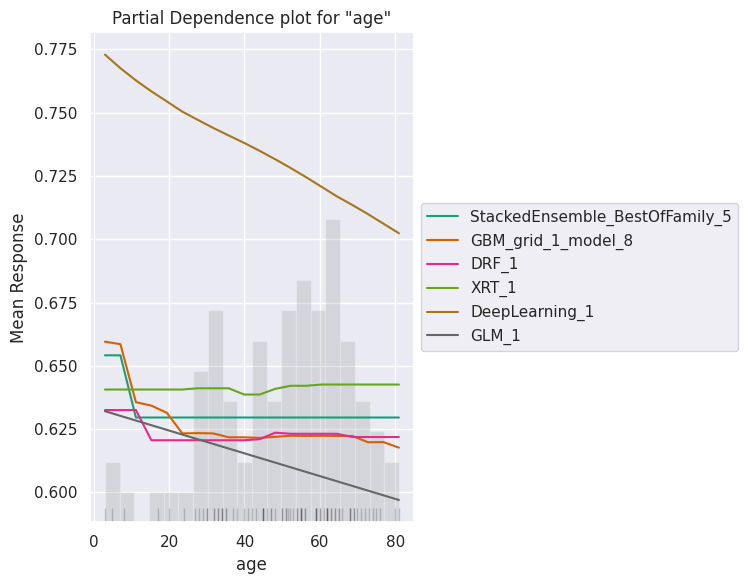

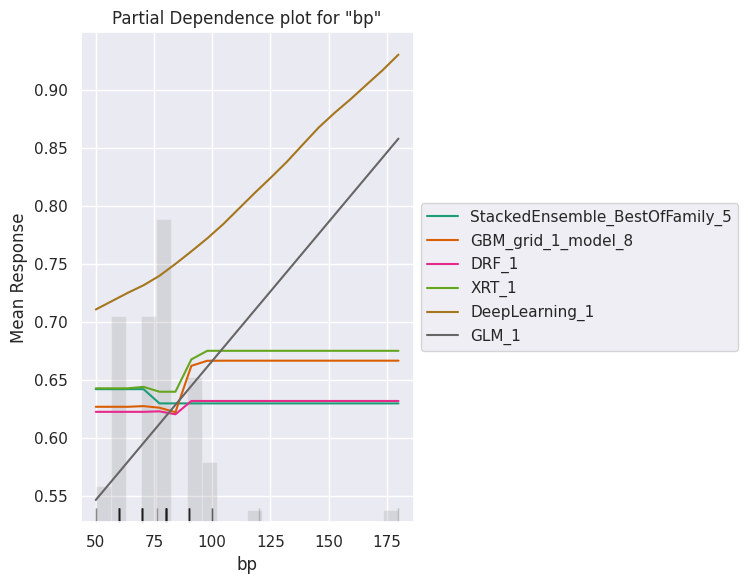

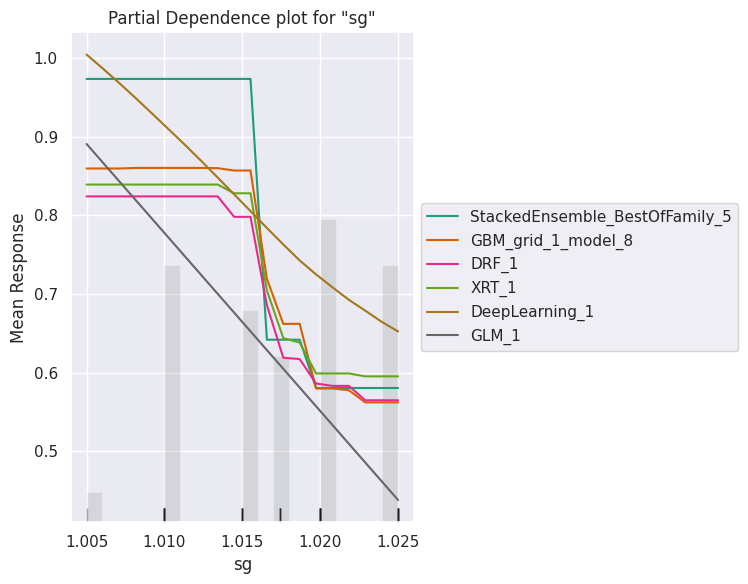

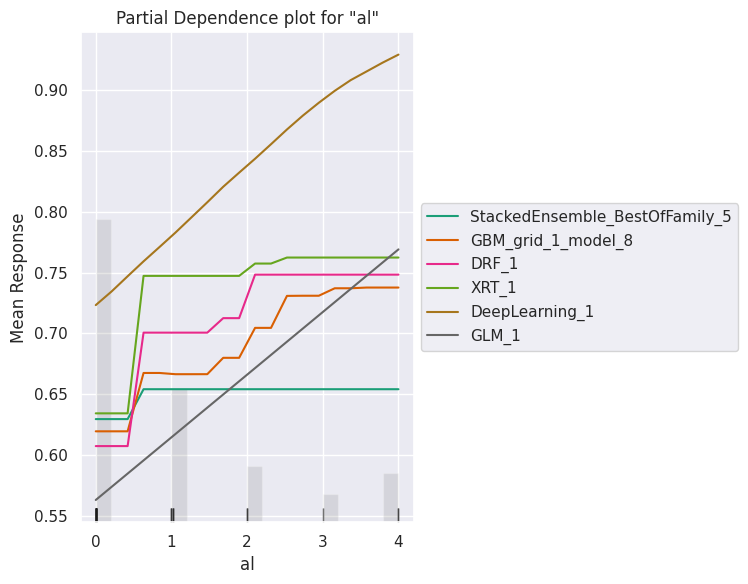

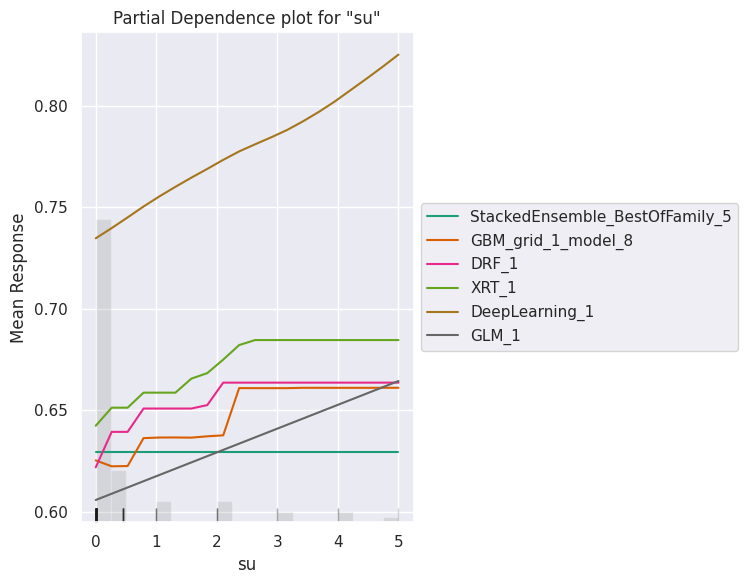

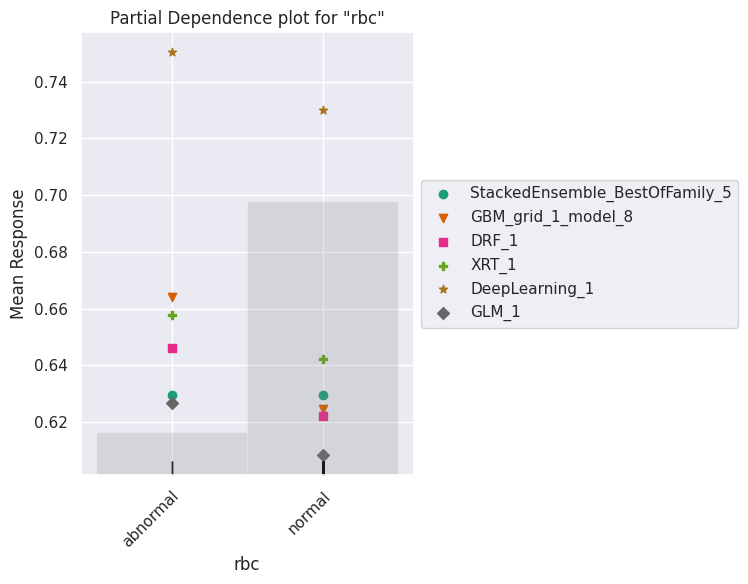

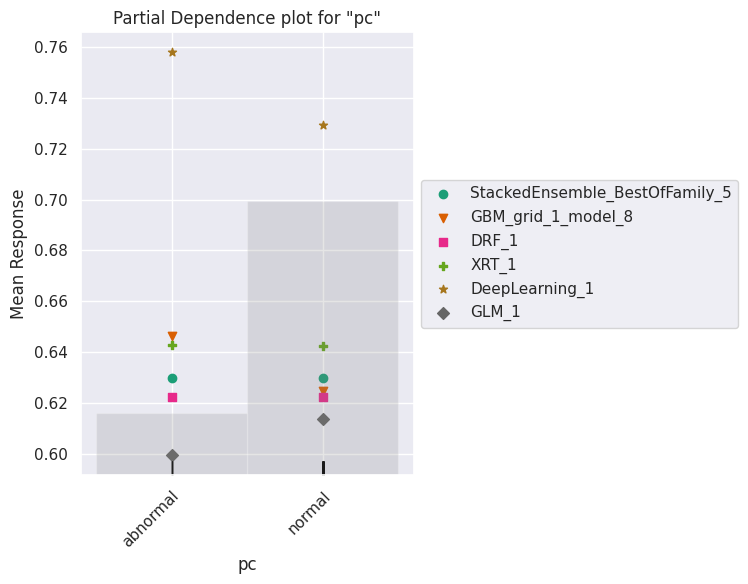

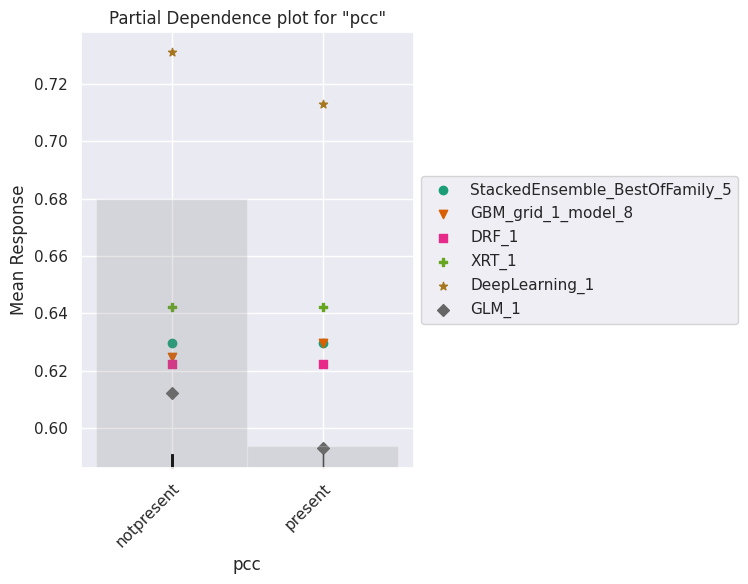

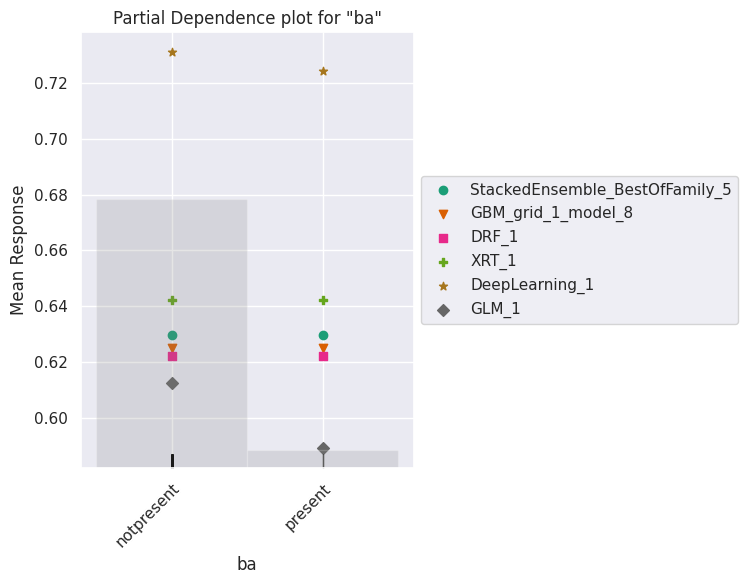

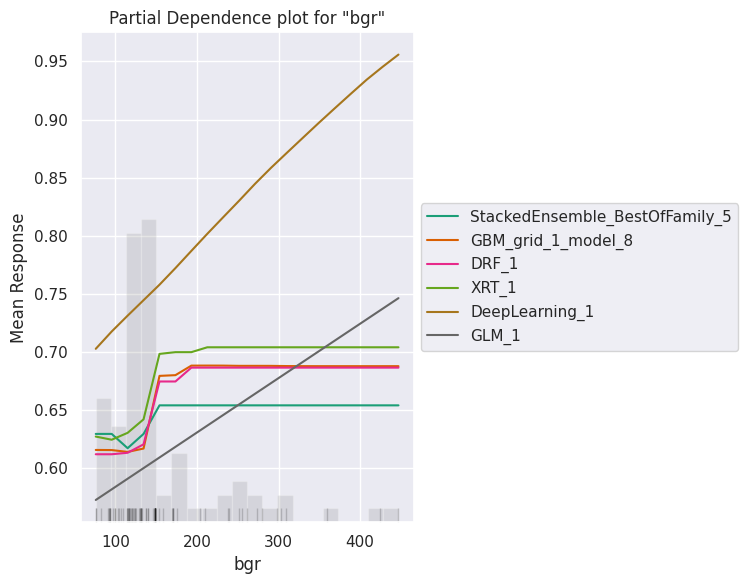

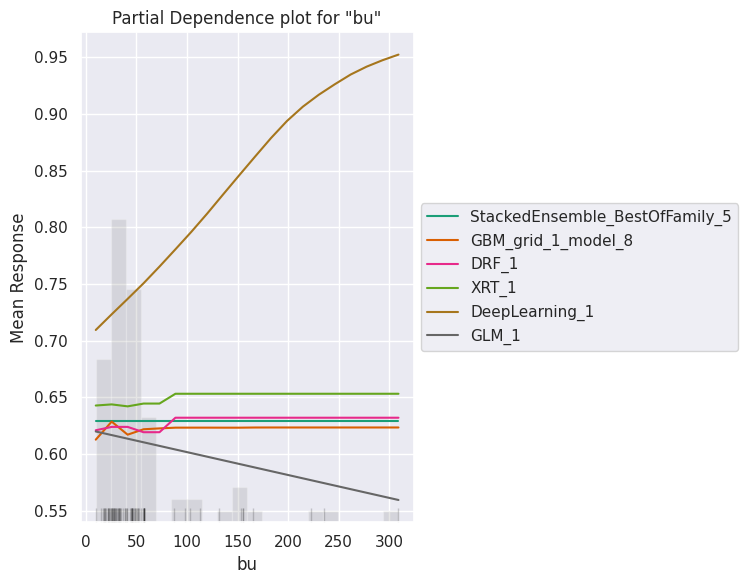

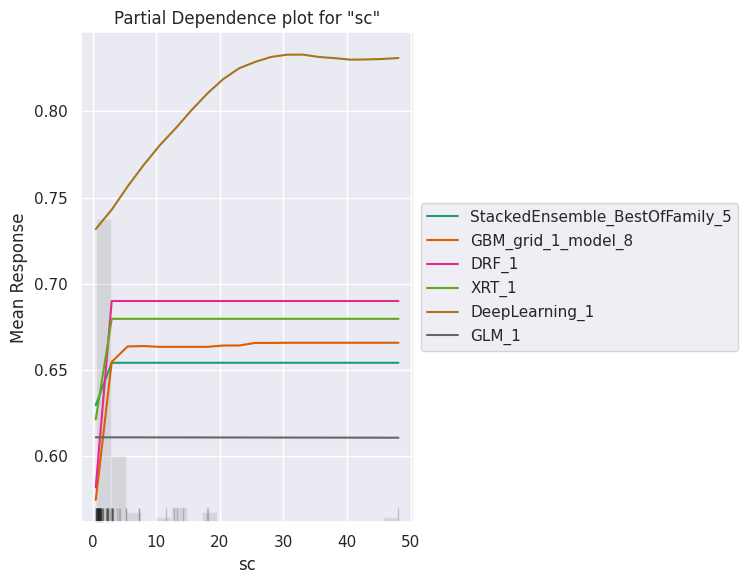

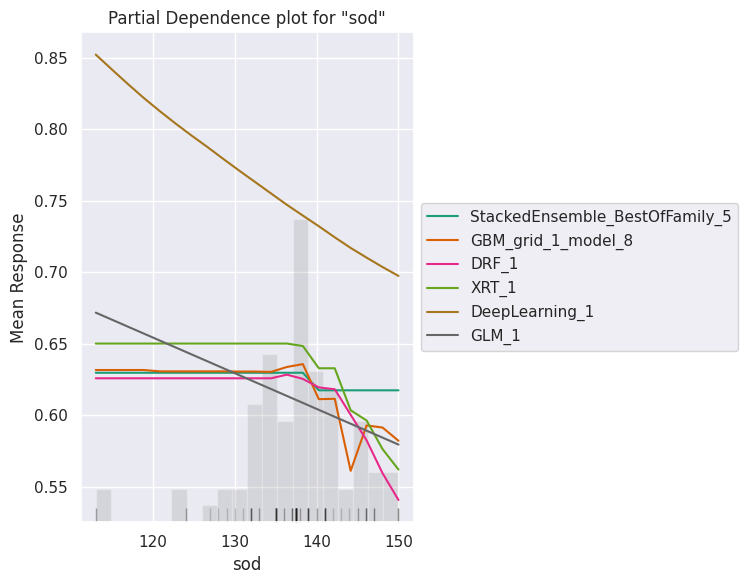

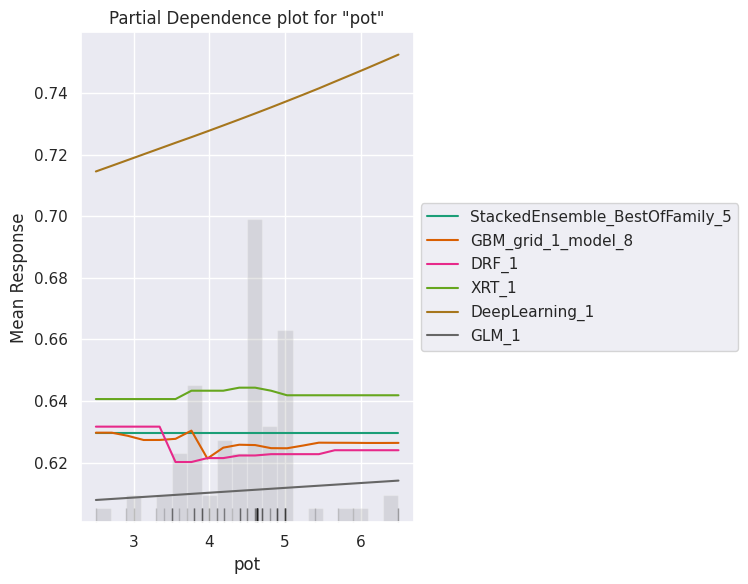

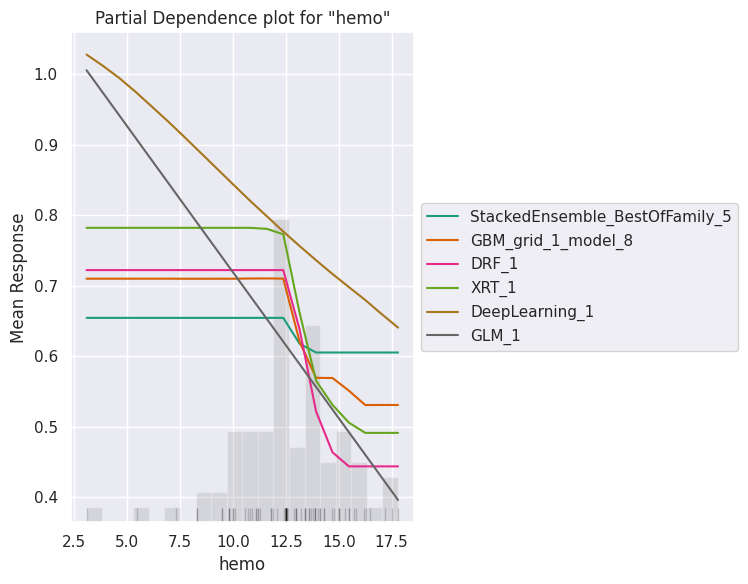

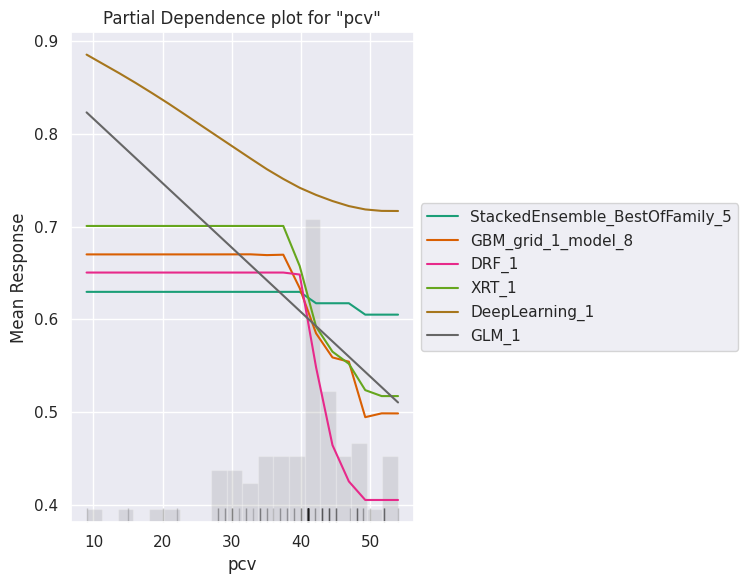

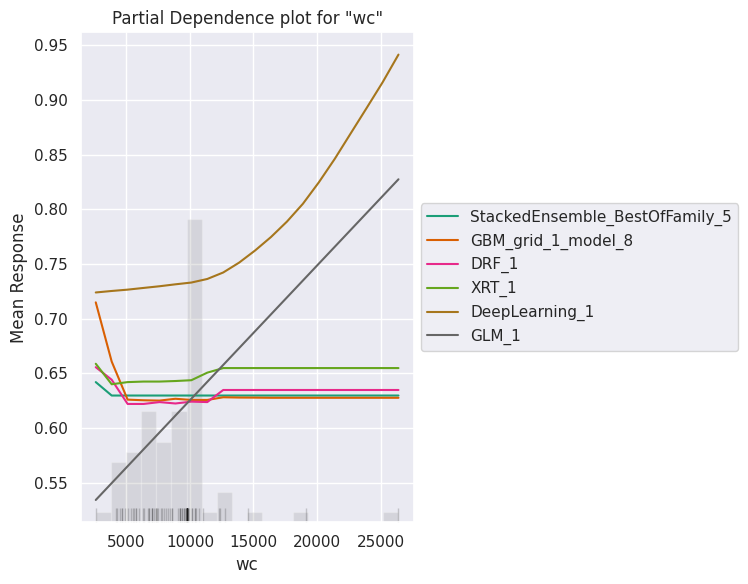

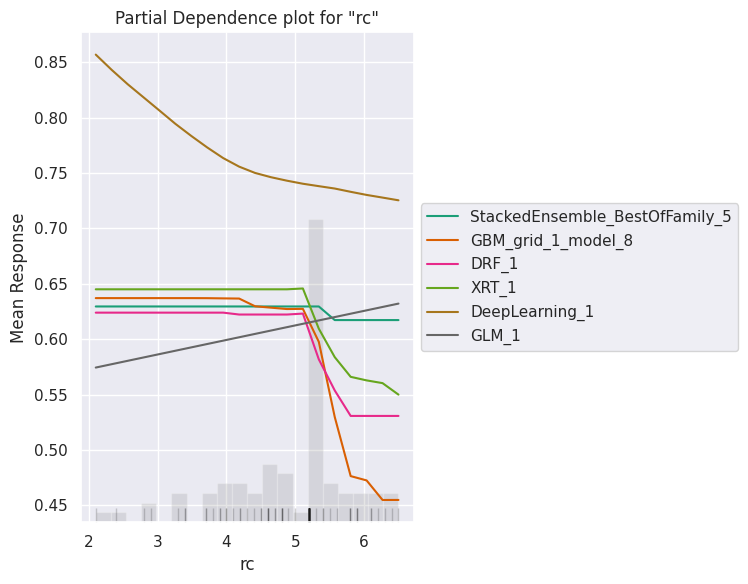

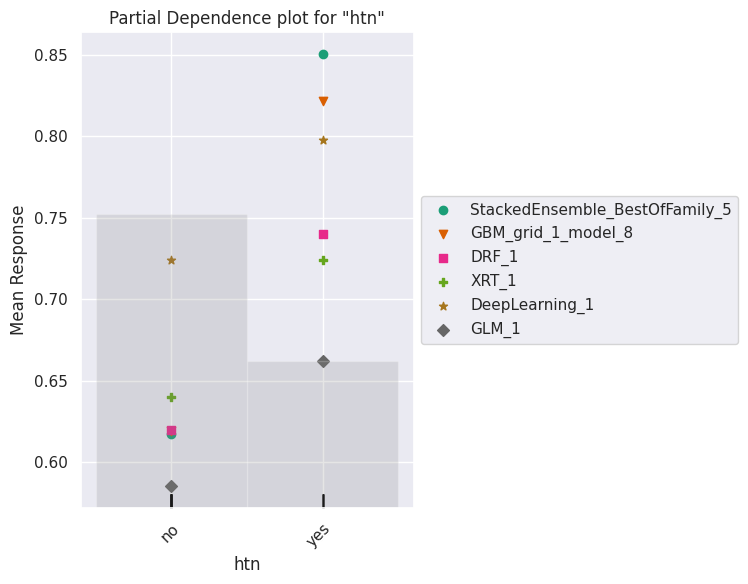

/usr/local/lib/python3.10/dist-packages/h2o/explanation/_explain.py:1632: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout(rect=[0, 0, 0.8, 1])
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


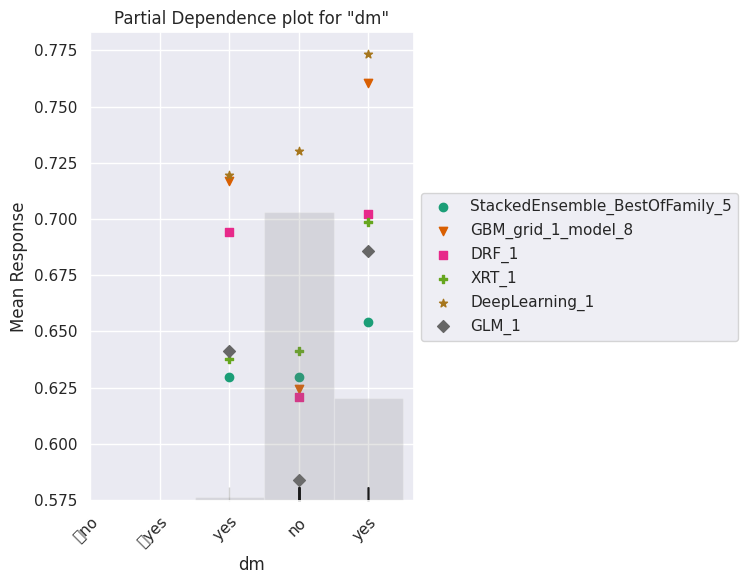

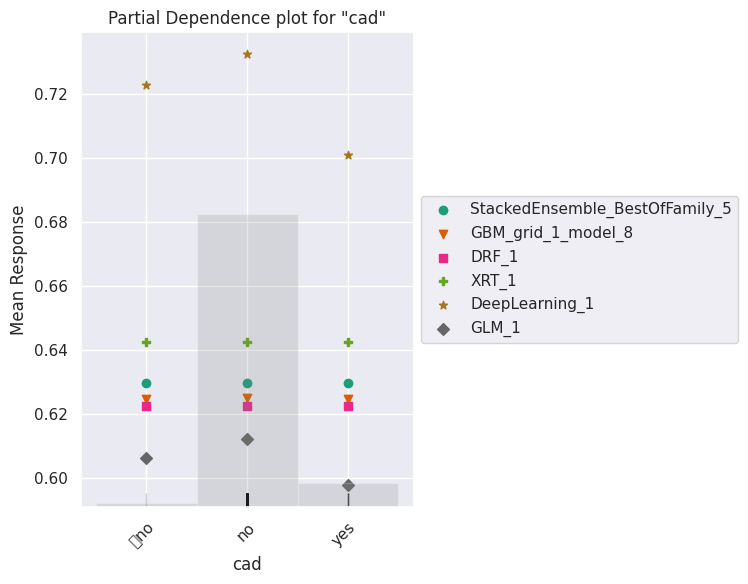

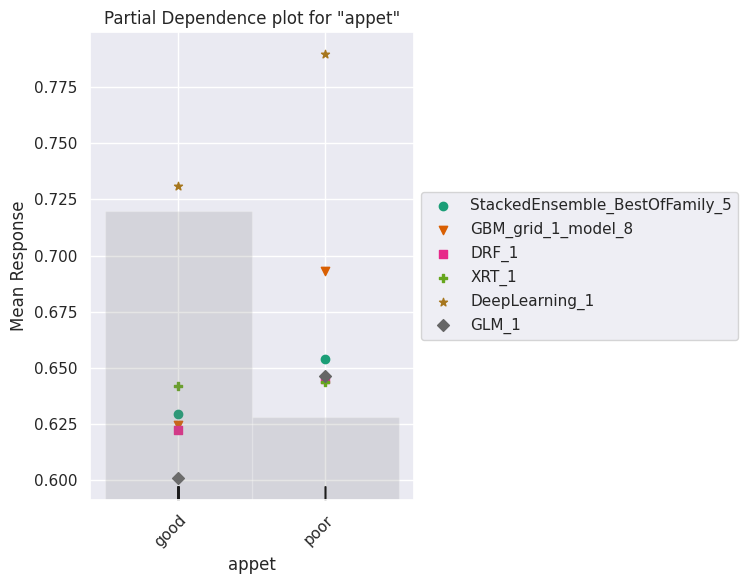

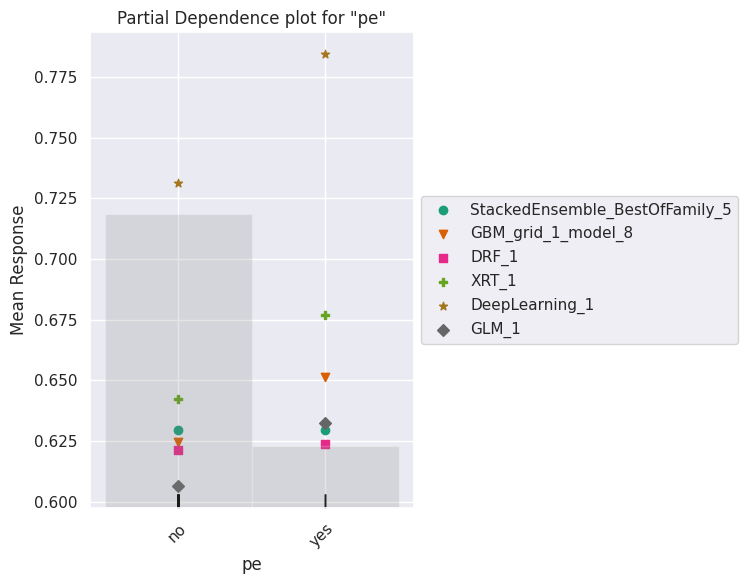

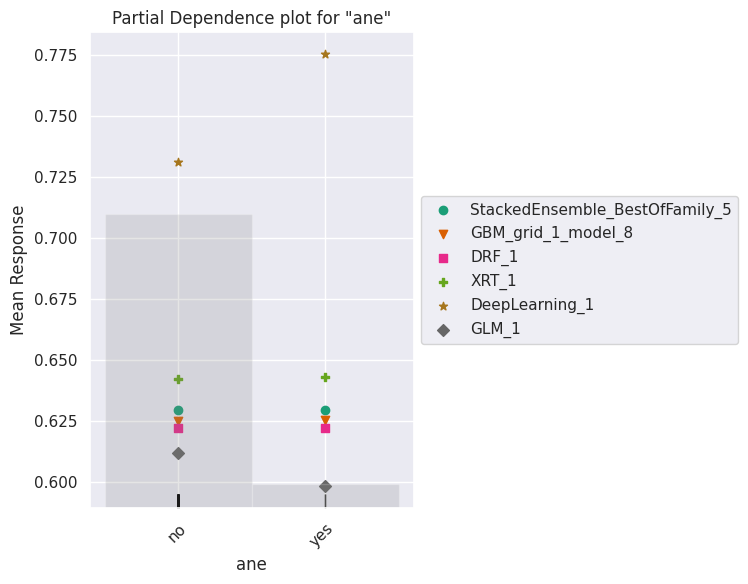

In [185]:
explain_model = aml.explain(frame = df1_test, figsize = (8,6),include_explanations=['pdp'])

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse        mse        mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  ---------  ---------  ------------------------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_1_20240220_21719_model_17             0.114579  0.0131284  0.0498042  0.0804388                 0.0131284                 331                   0.019178  GBM
GBM_grid_1_AutoML_1_20240220_21719_model_47             0.118763  0.0141047  0.0499651  0.0815196                 0.0141047                 784                   0.028008  GBM
GBM_grid_1_AutoML_1_20240220_21719_model_13             0.120662  0.0145594  0.0572446  0.0826012                 0.0145594                 572                   0.026027  GBM
StackedEnsemble_AllModels_5_AutoML_1_20240220_21719     0.122865  0.0150957  0.0359058  0.0824415                 0.0150957                1899                   0.233508  StackedEnsemble
GBM_grid_1_AutoML_1_20240220_21719_model_53             0.123211  0.015181   0.0503769  0.0866777                 0.015181                  310                   0.027349  GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20240220_21719  0.124952  0.0156129  0.0590476  0.0872648                 0.0156129                 131                   0.080224  StackedEnsemble
GBM_grid_1_AutoML_1_20240220_21719_model_8              0.125397  0.0157245  0.0500206  0.0875078                 0.0157245                 696                   0.034297  GBM
GBM_grid_1_AutoML_1_20240220_21719_model_45             0.12939   0.0167419  0.0665806  0.0865484                 0.0167419                 310                   0.031195  GBM
GBM_grid_1_AutoML_1_20240220_21719_model_40             0.129676  0.0168159  0.0526471  0.0937589                 0.0168159                 235                   0.022986  GBM
StackedEnsemble_AllModels_4_AutoML_1_20240220_21719     0.131671  0.0173372  0.0760089  0.0945453                 0.0173372                 447                   0.780741  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20240220_21719     0.131671  0.0173372  0.0760089  0.0945453                 0.0173372                 538                   0.670806  StackedEnsemble
GBM_grid_1_AutoML_1_20240220_21719_model_2              0.132118  0.0174552  0.0563201  0.0920335                 0.0174552                 531                   0.01361   GBM
GBM_3_AutoML_1_20240220_21719                           0.133682  0.0178709  0.0656307  0.0955522                 0.0178709                 537                   0.0231    GBM
GBM_grid_1_AutoML_1_20240220_21719_model_32             0.134167  0.0180008  0.0679231  0.0966961                 0.0180008                 320                   0.018153  GBM
GBM_grid_1_AutoML_1_20240220_21719_model_12             0.135129  0.01826    0.0556129  0.0937798                 0.01826                   564                   0.024798  GBM
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_21719  0.137709  0.0189637  0.0623572  0.0961304                 0.0189637                 137                   0.06377   StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20240220_21719     0.137827  0.0189962  0.062408   0.0961736                 0.0189962                 244                   0.088565  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240220_21719     0.140132  0.0196369  0.0678143  0.0976527                 0.0196369                 270                   0.098993  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_21719  0.140226  0.0196634  0.0676894  0.0976683                 0.0196634                 270                   0.044151  StackedEnsemble
GBM_4_AutoML_1_20240220_21719                           0.140688  0.0197931  0.0697834  0.103205                  0.0197931                 462                   0.017921  GBM
[20 rows x 9 column

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

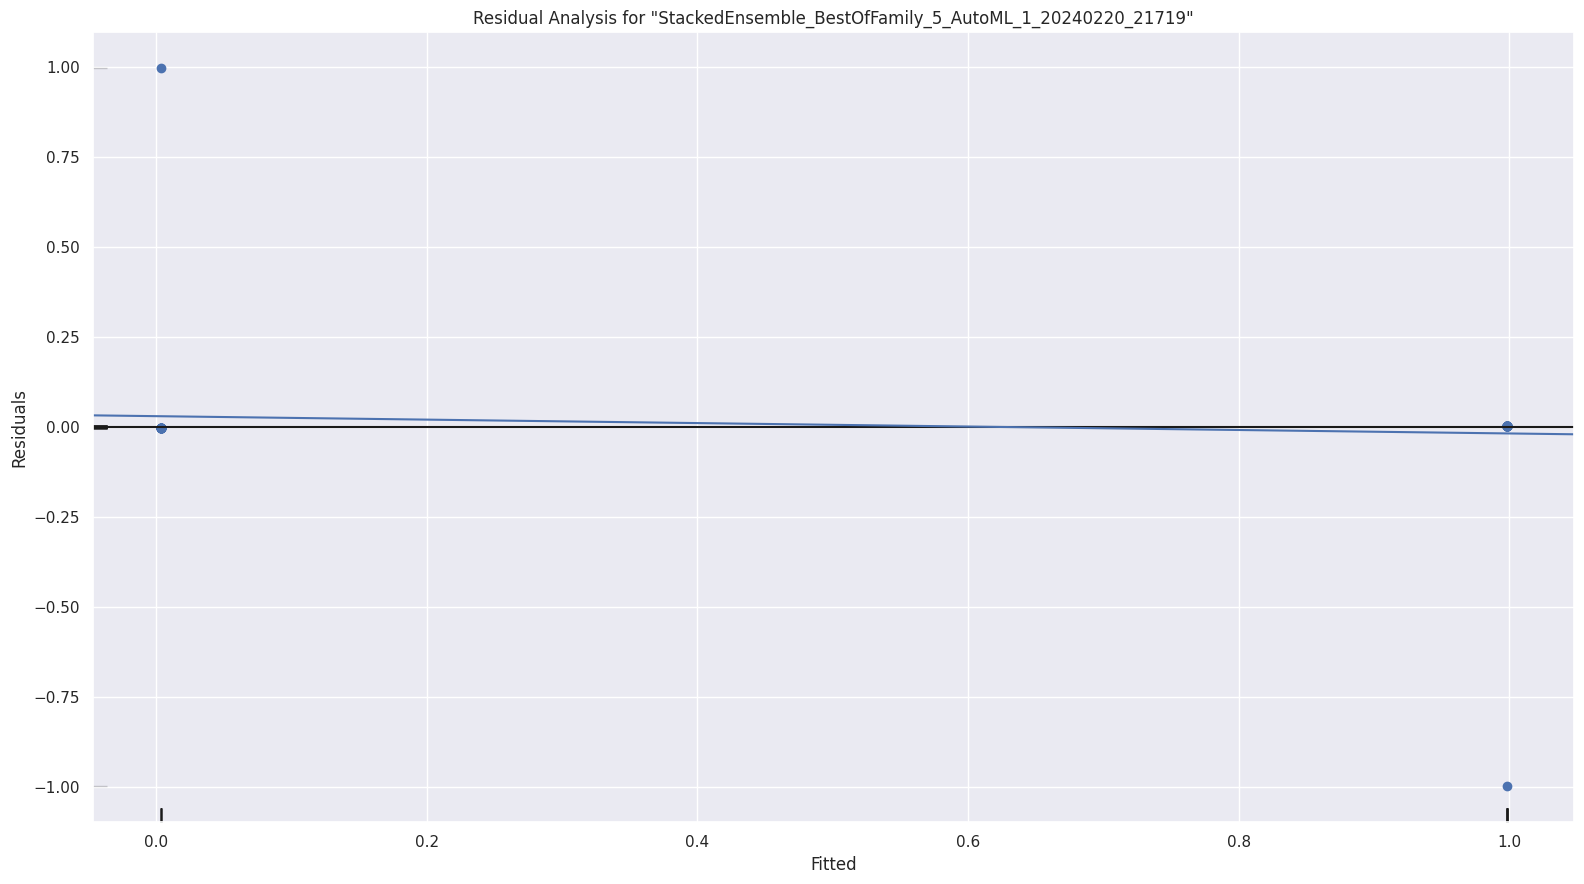

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

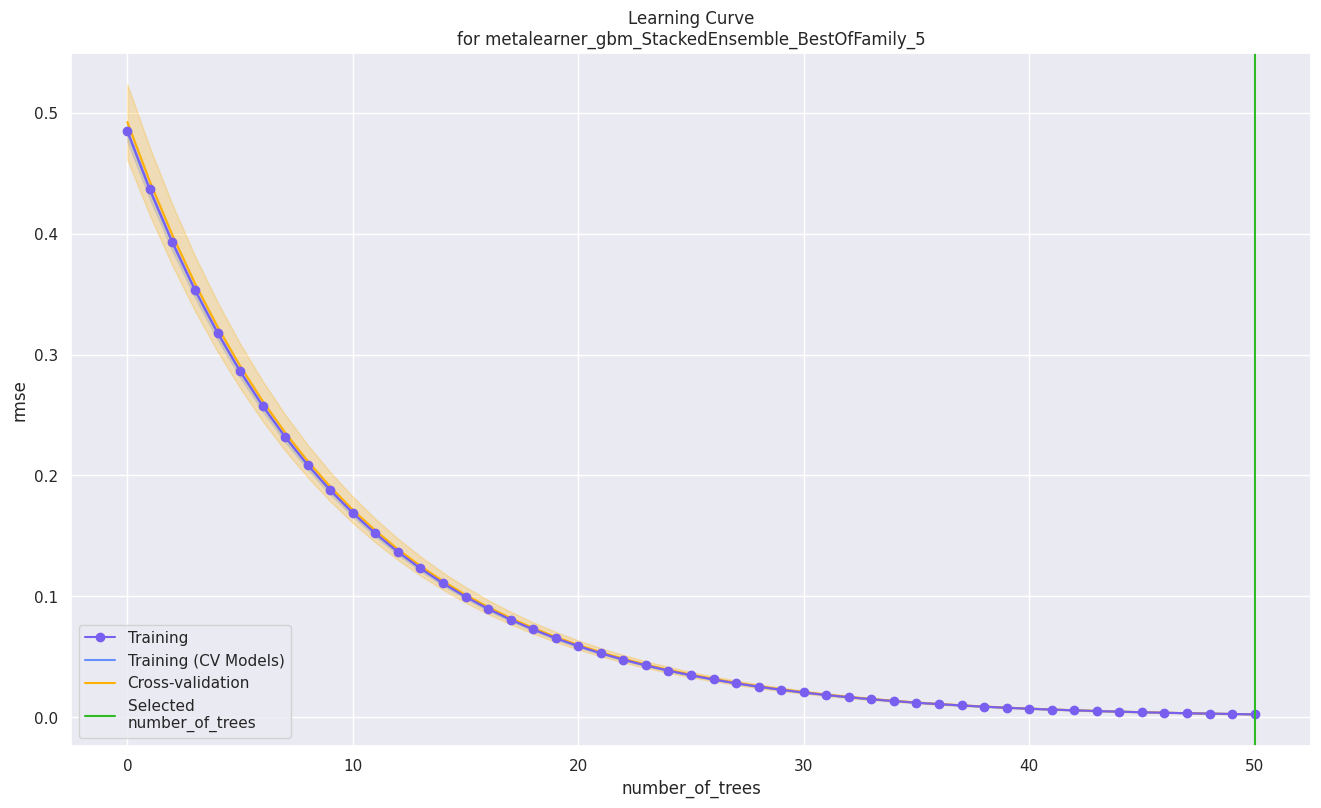

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

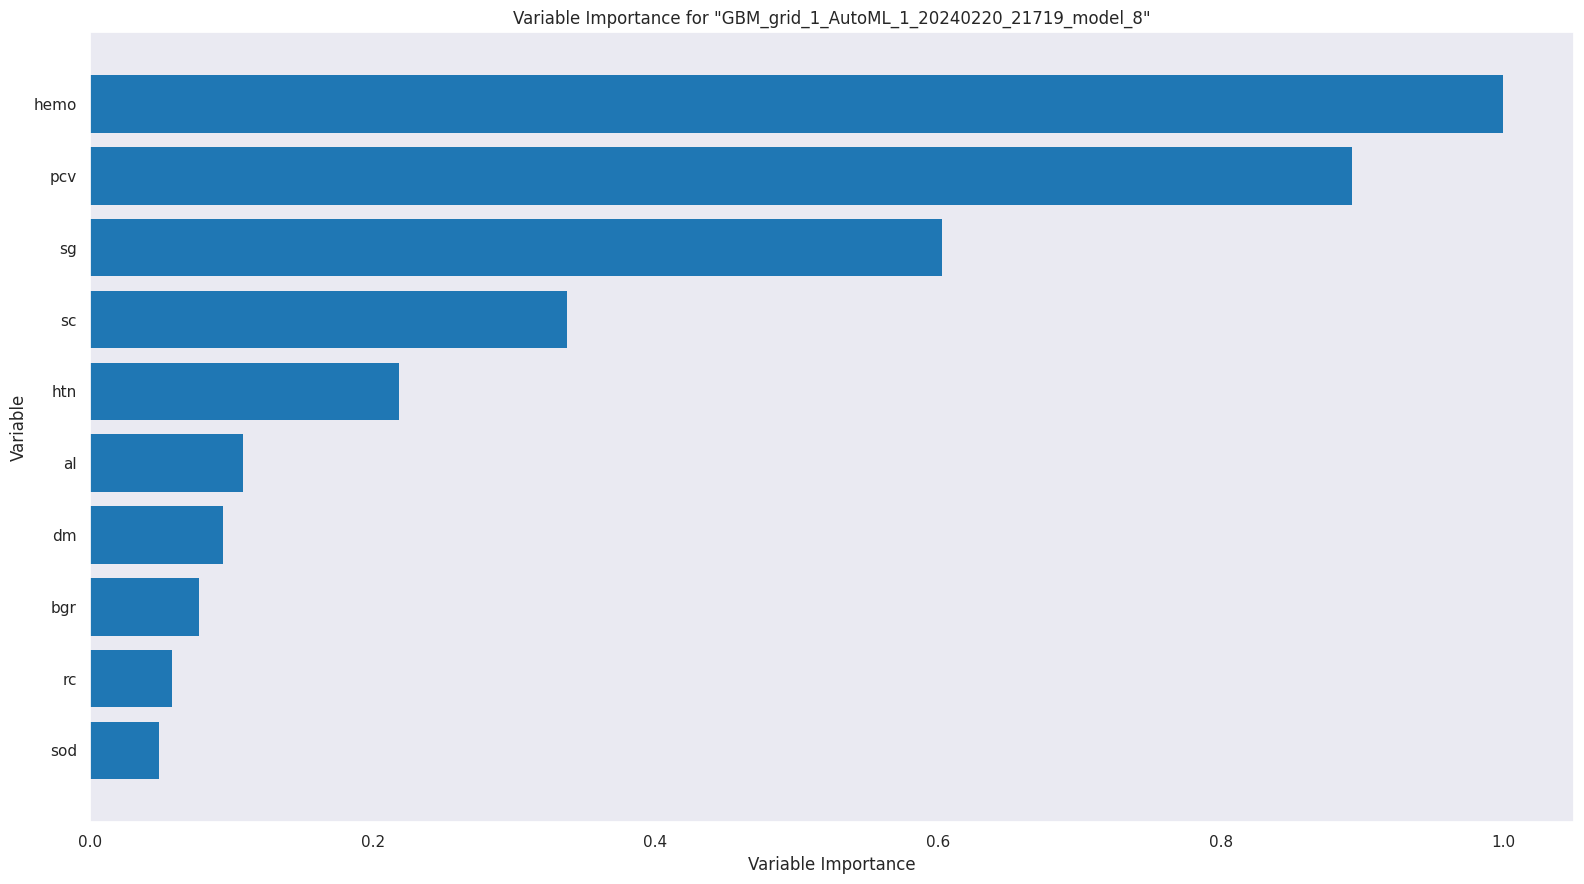

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

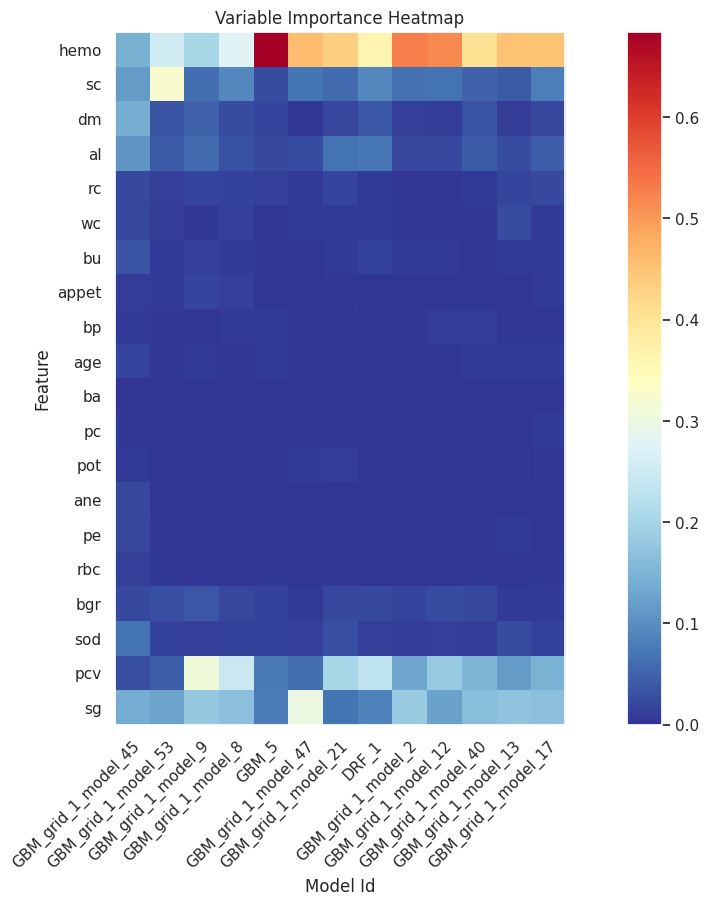

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

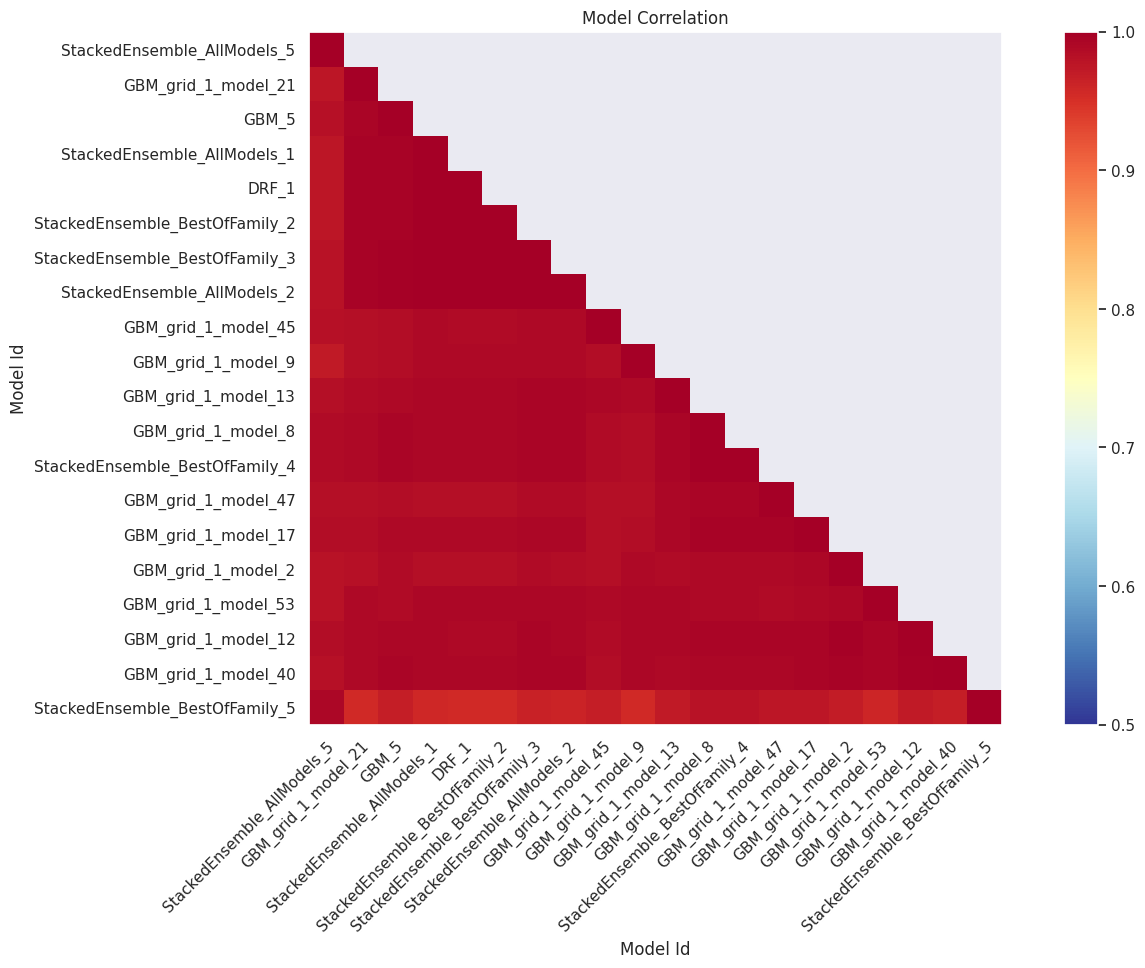

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

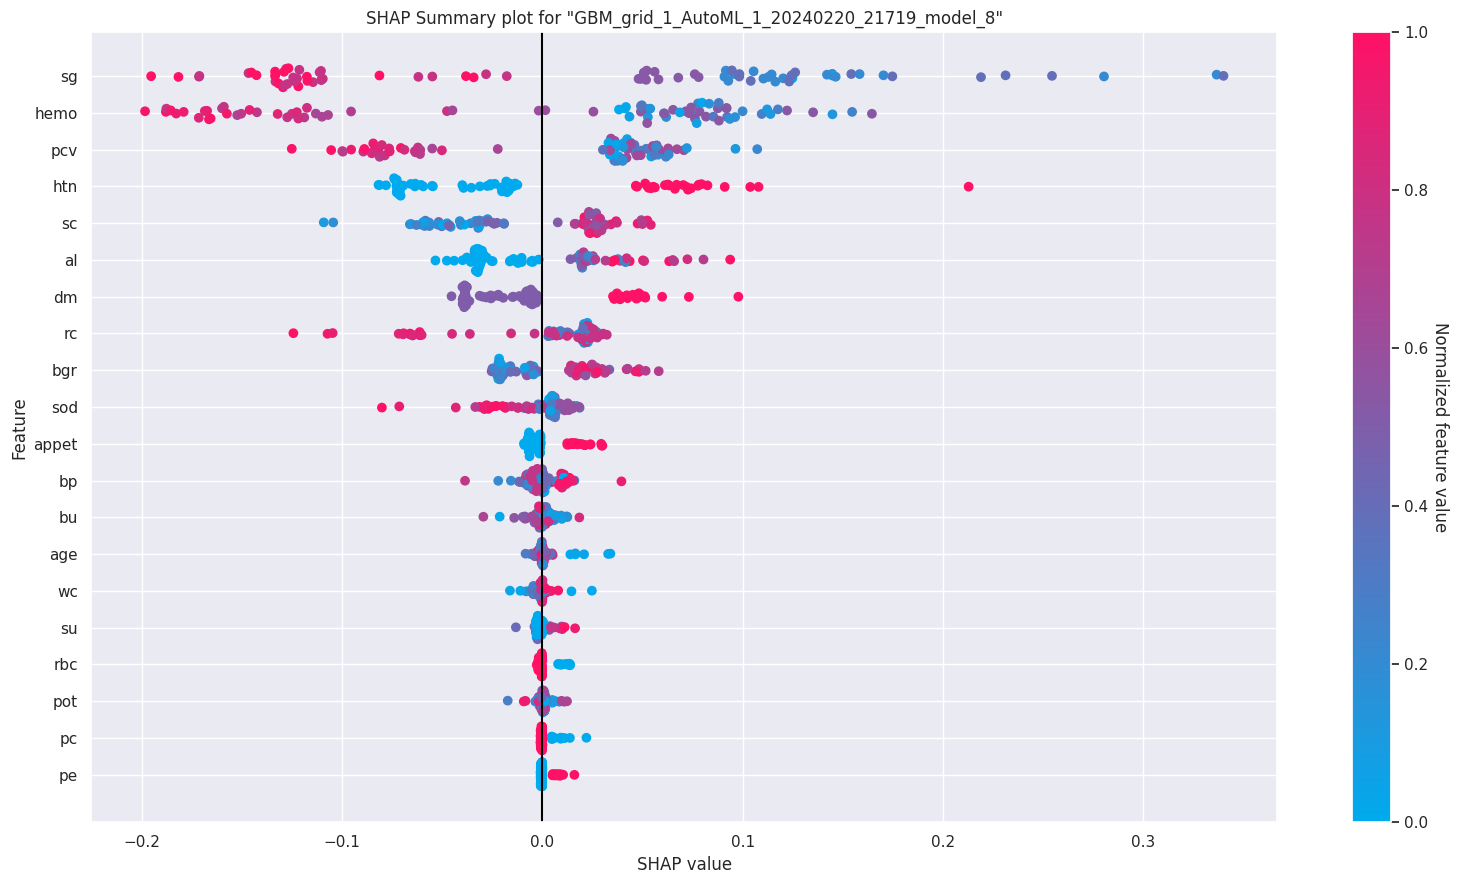

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

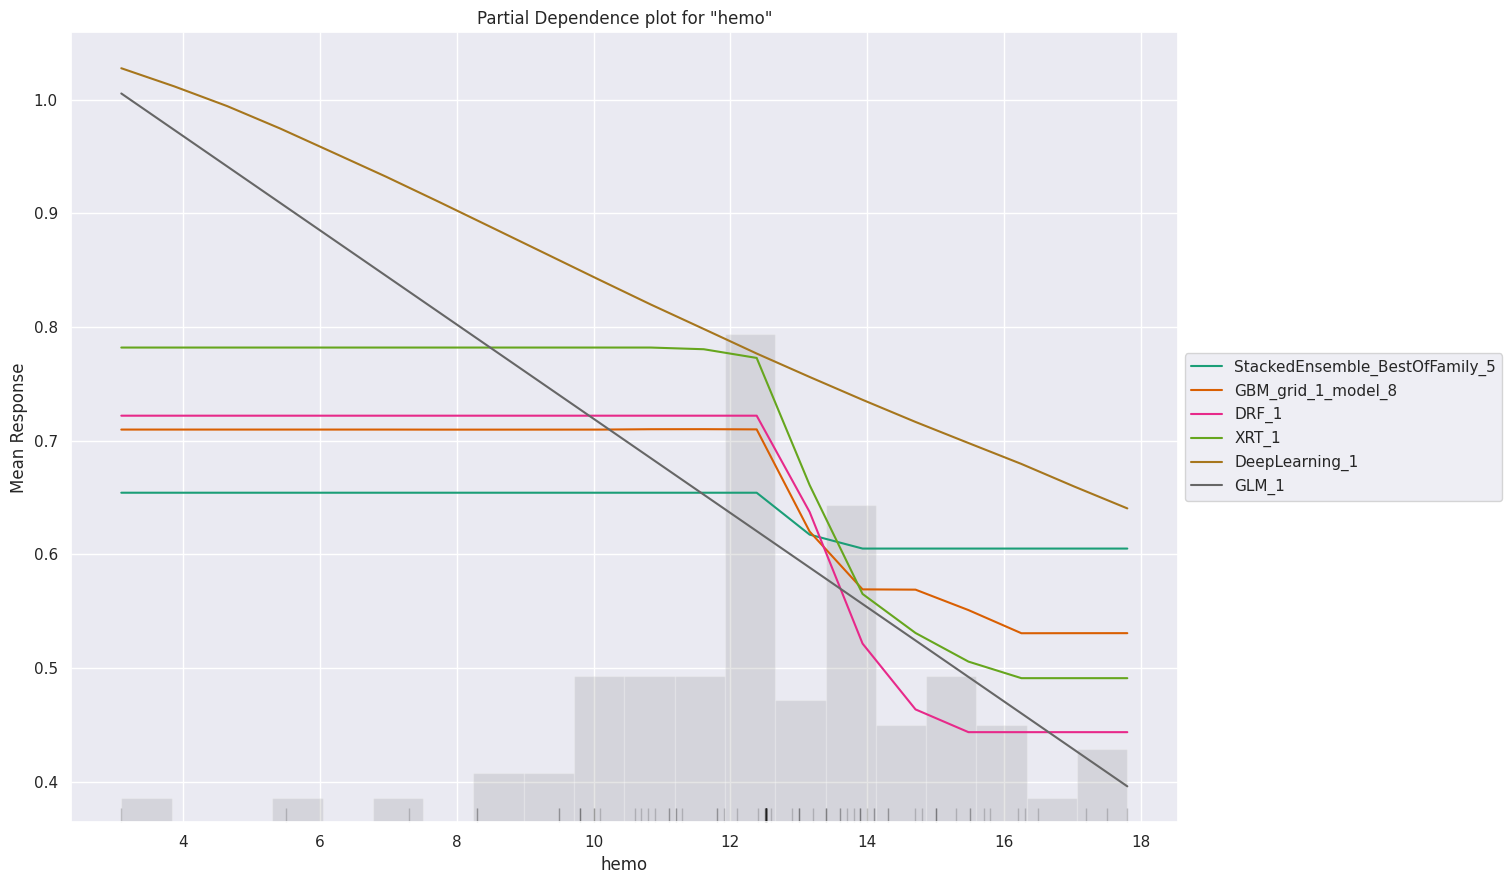

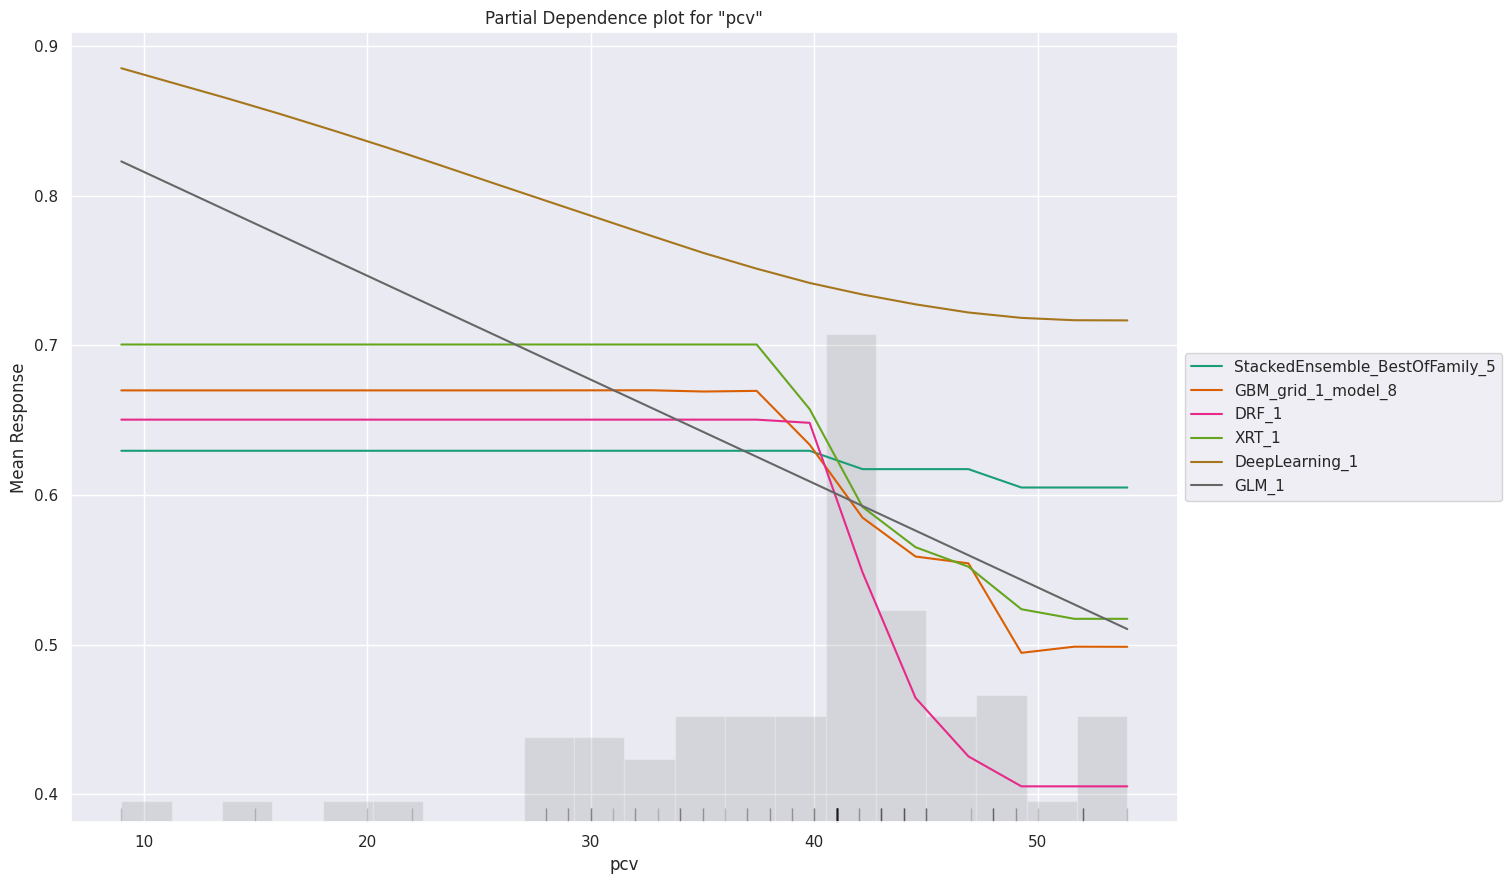

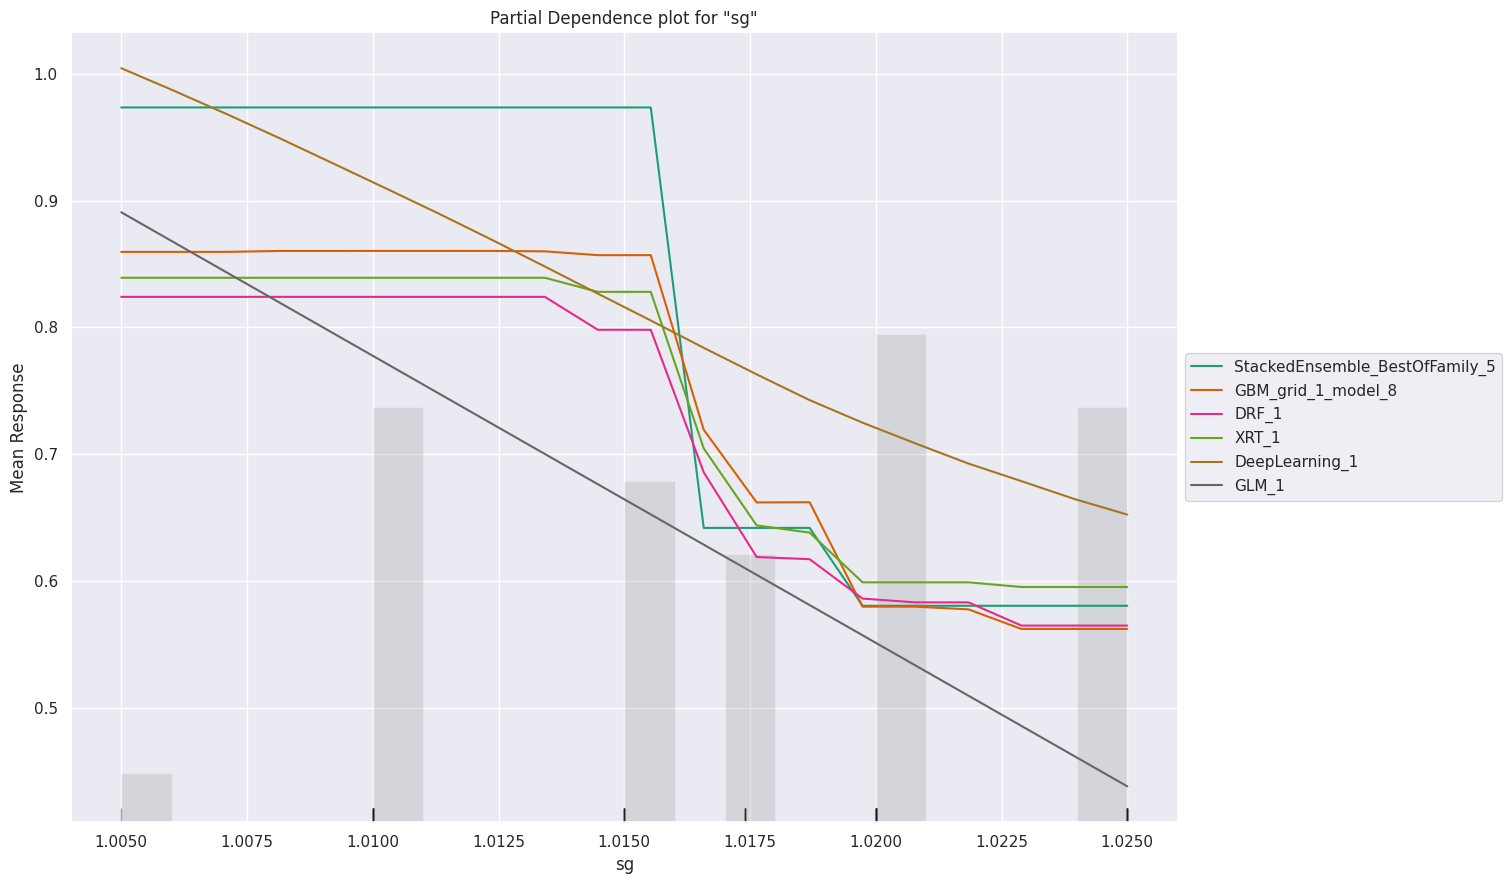

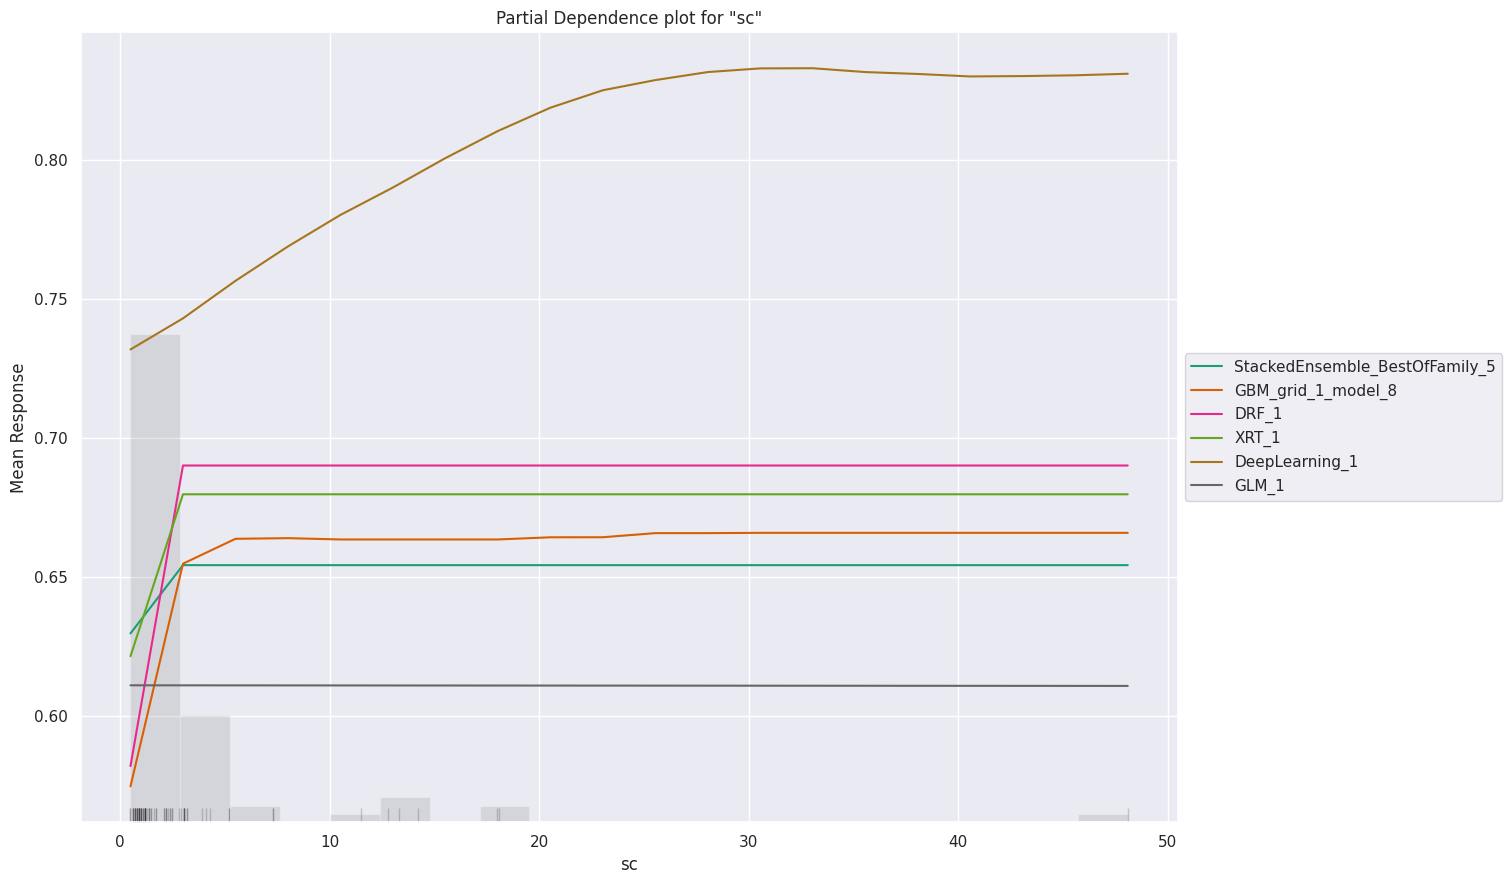

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

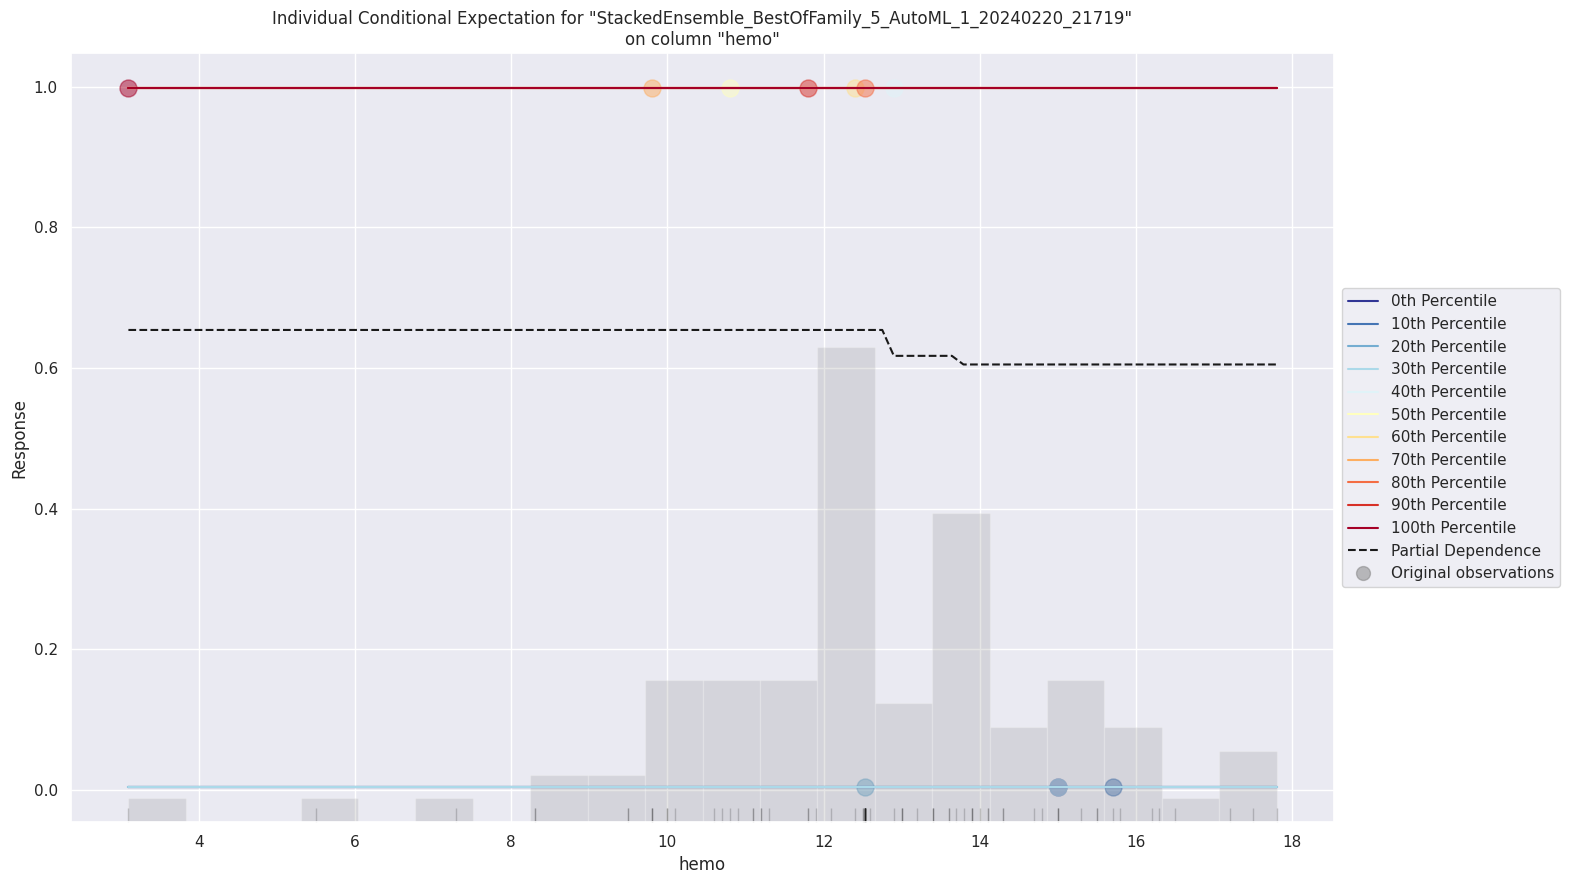

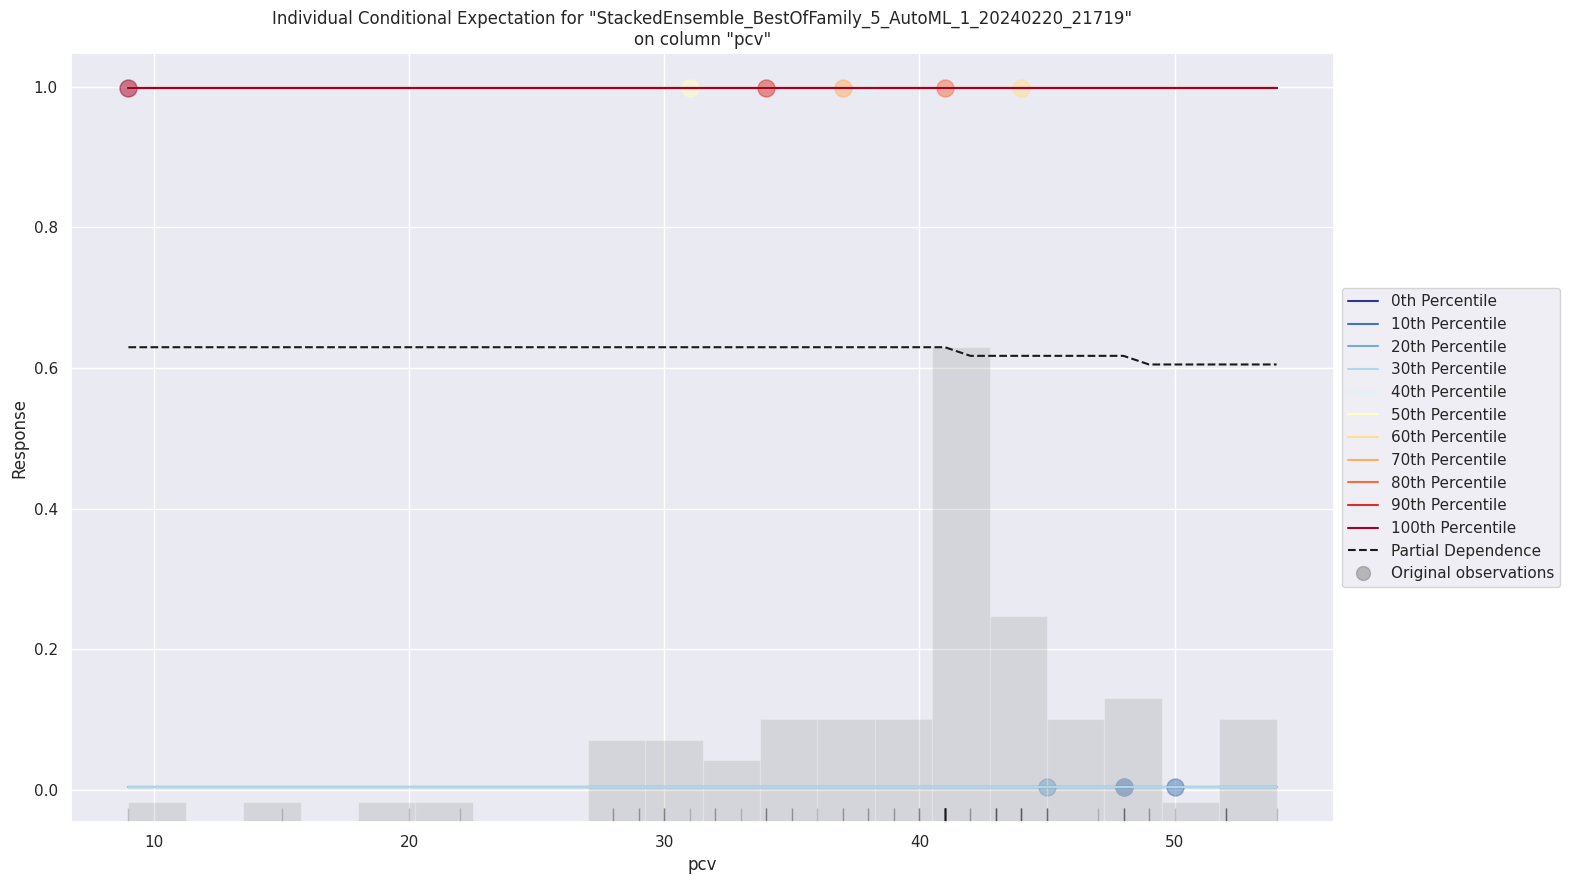

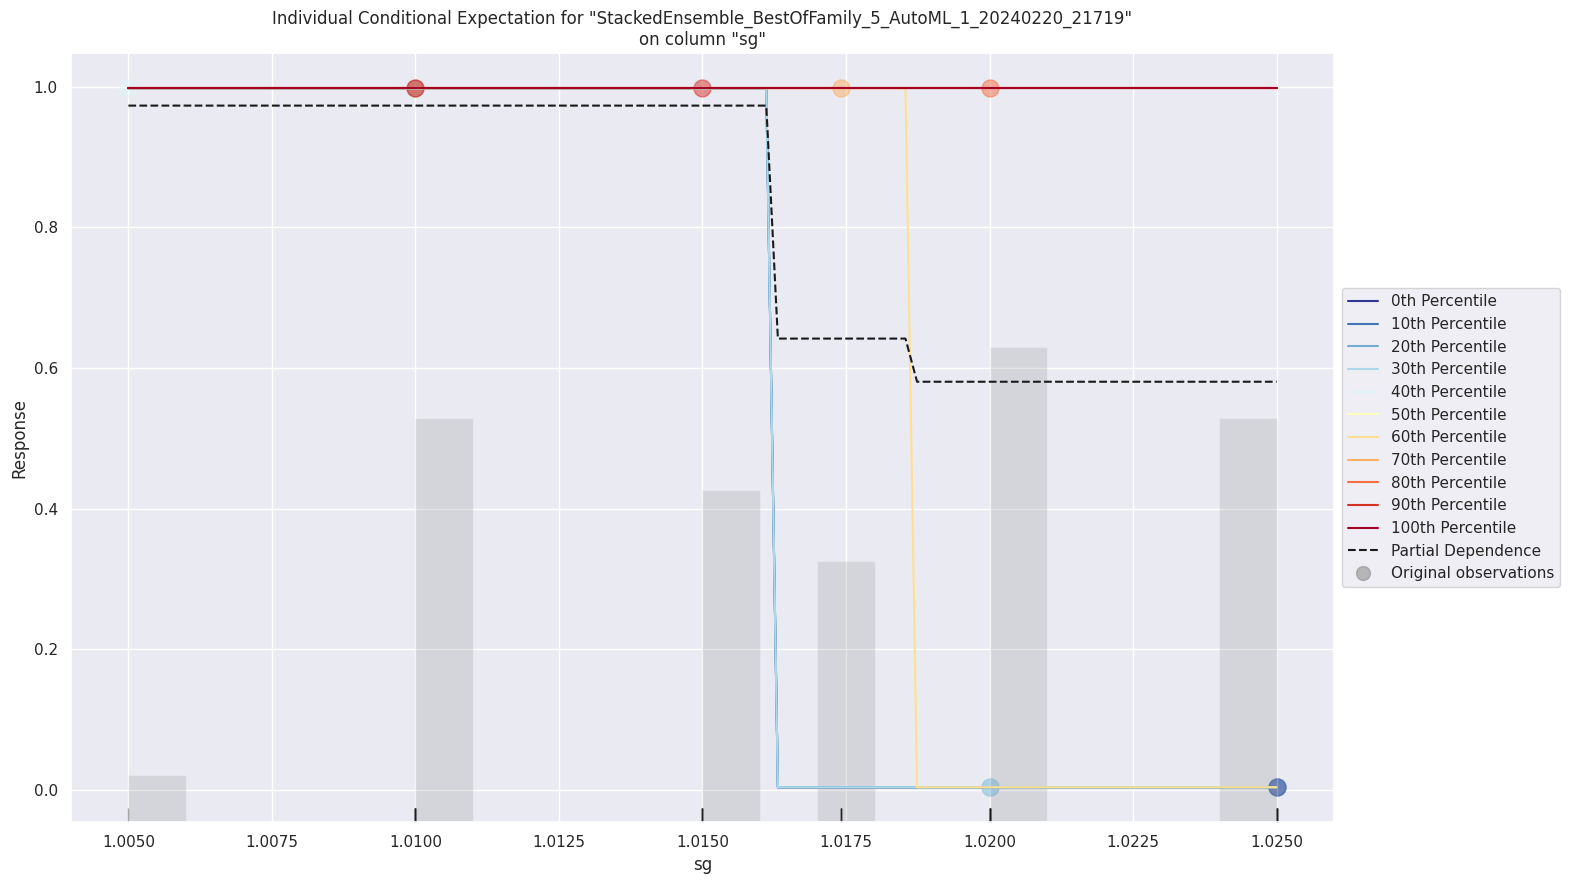

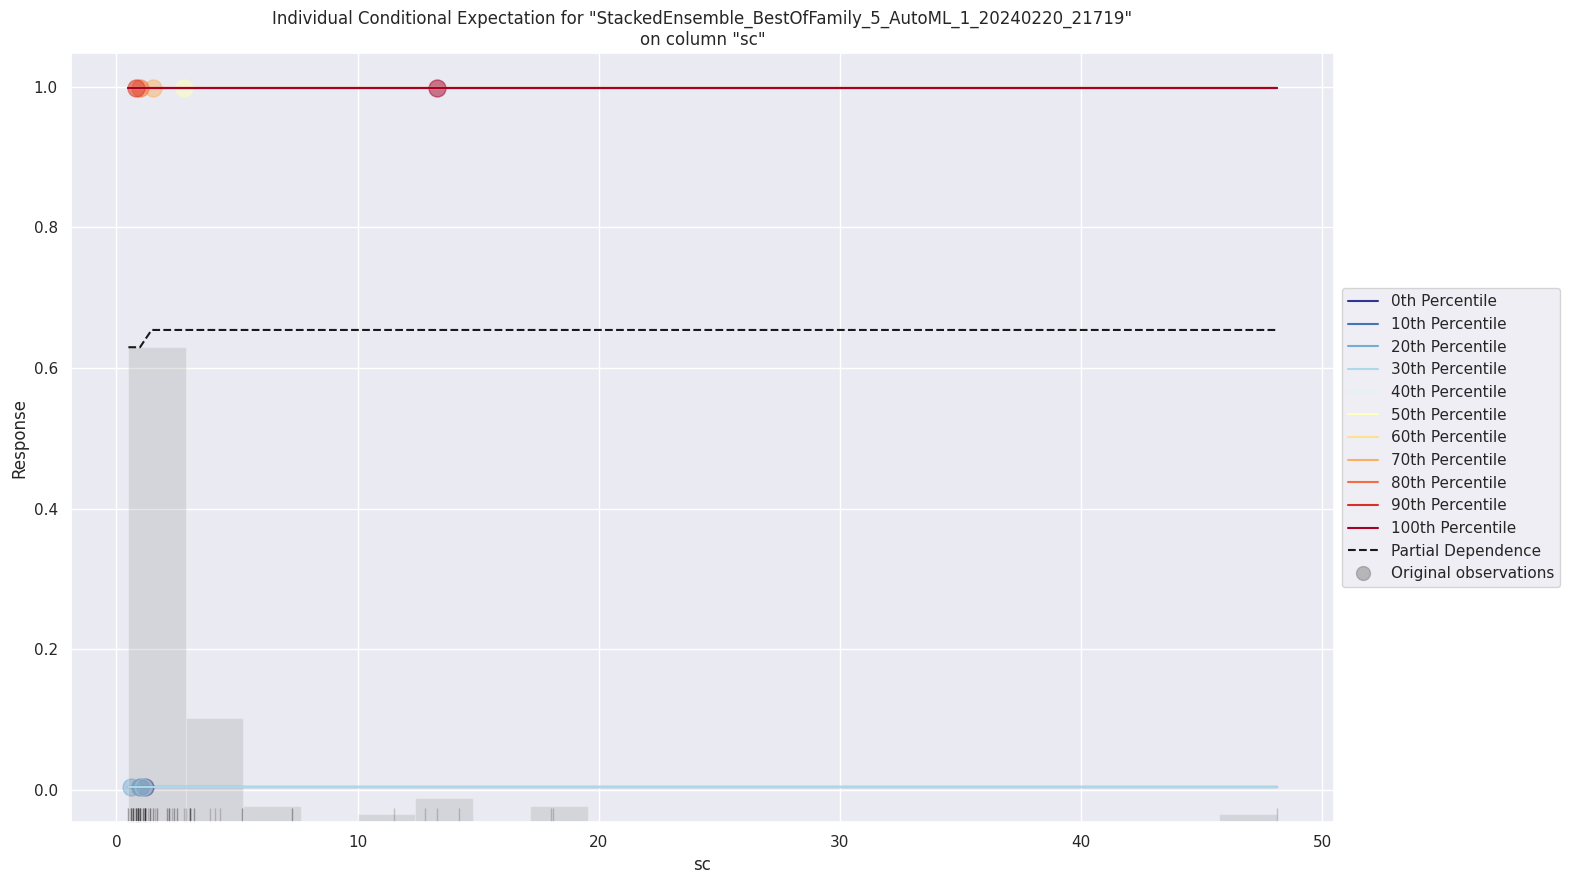

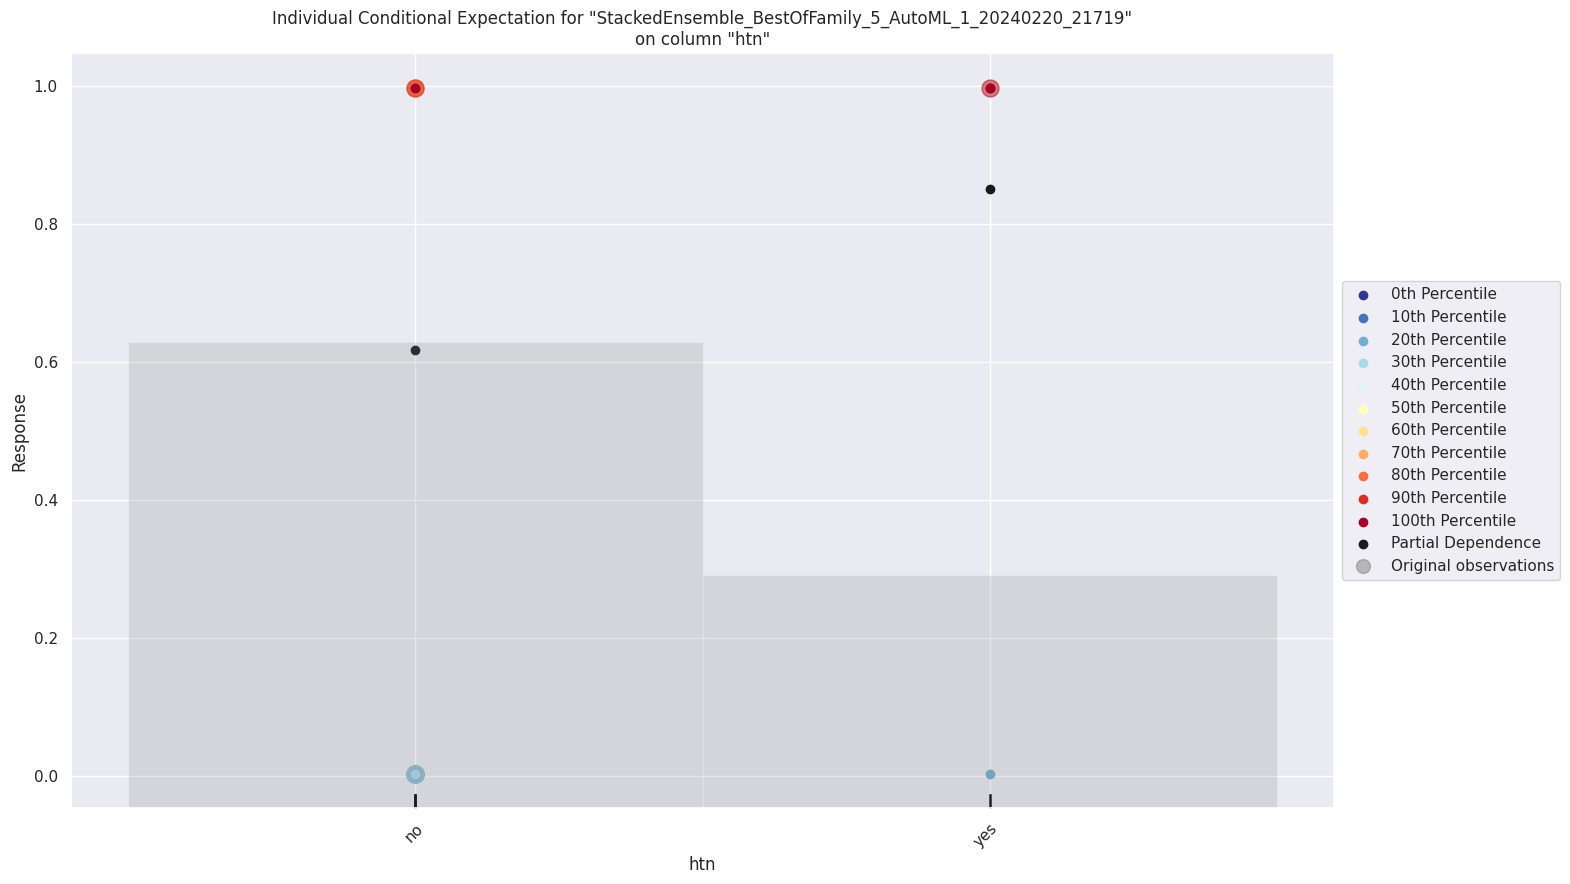

In [186]:
exa = aml.explain(df1_test)

EXPLINATION
Partial Dependence Plots (PDP):

PDPs show the relationship between a feature and the predicted outcome while averaging out the effects of all other features. They can highlight the general influence of a feature across the entire dataset, regardless of the values of other features.
A PDP is constructed by calculating the predictions across the range of a feature while keeping all other features constant at their average values.
The shape of a PDP can indicate whether the relationship between the feature and the target is linear, monotonic, or more complex.
SHAP Values:

SHAP (SHapley Additive exPlanations) values provide insights into the contribution of each feature to the prediction for an individual sample. They are based on game theory and offer a consistent way to attribute prediction effects to each feature.
A SHAP value for a feature represents the average marginal contribution of a feature across all possible combinations of features. In essence, it tells us how much knowing a feature's value changes the prediction compared to if we did not know the feature's value.
A positive SHAP value for a feature indicates that knowing the feature's value pushes the model's prediction higher, while a negative SHAP value indicates the opposite.
SHAP values can be visualized through summary plots that show the distribution of the impact each feature has on the model's output, or through force plots that break down a prediction into its constituent SHAP values.
Residual Analysis:

Residuals are the differences between the observed values and the values predicted by the model. Residual analysis involves examining these differences to see how well the model fits the data and to uncover any patterns that might suggest issues with the model.
A well-fitting model will have residuals that are randomly distributed around zero, indicating that the model does not systematically over- or under-predict certain ranges of values.
Patterns in residual plots, such as a clear shape or trend, can suggest problems like non-linearity, heteroscedasticity (non-constant variance), or outliers. It can also indicate that some important predictor is missing from the model.
Residual analysis can help in improving a model by identifying these issues, which can then be addressed through model refinement or transformation of variables.
These interpretations provide a high-level understanding of what each of

In [187]:
import statsmodels.formula.api as smf  # OLS model Library

In [188]:
import h2o
pandas_df = h2o.as_list(h2o_df)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [189]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [190]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [192]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [193]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [196]:
# Assuming 'train' is your training H2OFrame
# Create a list of predictor column names, excluding the target column 'y'
predictor_columns = [name for name in train.columns if name != 'classification']
y = 'classification'  # 'y' is the name of your target variable

# Now train your GBM model using the list of predictor column names
gbm_grid2.train(
    x=predictor_columns,
    y=y,
    training_frame=train,
    validation_frame=validate,
    ntrees=100,
    seed=1
)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  --------------------
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.010788507516927151
     0.4                  0.08          6.0          0.9                 gbm_grid2_model_28  0.011831237007902647
     0.1                  0.07          7.0          0.8                 gbm_grid2_model_9   0.011945555082094017
     0.2                  0.04          5.0          0.9                 gbm_grid2_model_29  0.012161857629324473
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.012987232834590384
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.013899488621989491
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.017910094449587525
     0.6000000000000001   0.1           4.0          1.0                 gbm_grid2_model_22  0.018540129506873573
     0.5                  0.05          2.0          0.8                 gbm_grid2_model_27  0.018798366746552598
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.019319968123804432
---  ---                  ---           ---          ---                 ---                 ---
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.029227177790286826
     0.8                  0.03          5.0          0.5                 gbm_grid2_model_12  0.029482362258111558
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.030451714477145248
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.03160976288165773
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  0.032548538589480105
     0.9                  0.04          4.0          0.9                 gbm_grid2_model_31  0.035026247681334756
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.052726786937410806
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.05869366650478457
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.07885439716310623
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.08125534917700114
[36 rows x 7 columns]

In [197]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [198]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  --------------------
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.010788507516927151
     0.4                  0.08          6.0          0.9                 gbm_grid2_model_28  0.011831237007902647
     0.1                  0.07          7.0          0.8                 gbm_grid2_model_9   0.011945555082094017
     0.2                  0.04          5.0          0.9                 gbm_grid2_model_29  0.012161857629324473
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.012987232834590384
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.013899488621989491
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.017910094449587525
     0.6000000000000001   0.1           4.0          1.0                 gbm_grid2_model_22  0.018540129506873573
     0.5                  0.05          2.0          0.8                 gbm_grid2_model_27  0.018798366746552598
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.019319968123804432
---  ---                  ---           ---          ---                 ---                 ---
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.029227177790286826
     0.8                  0.03          5.0          0.5                 gbm_grid2_model_12  0.029482362258111558
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.030451714477145248
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.03160976288165773
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  0.032548538589480105
     0.9                  0.04          4.0          0.9                 gbm_grid2_model_31  0.035026247681334756
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.052726786937410806
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.05869366650478457
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.07885439716310623
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.08125534917700114
[36 rows x 7 columns]

In [202]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [203]:
models = gbm_gridperf2.models

In [204]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [205]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [206]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [207]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.1        0.06          8          0.9           0.010789
1               0.4        0.08          6          0.9           0.011831
2               0.1        0.07          7          0.8           0.011946
3               0.2        0.04          5          0.9           0.012162
4               0.1        0.08          3          0.8           0.012987
5               0.3        0.03          8          1.0           0.013899
6               0.5        0.05          7          0.9           0.017910
7               0.6        0.10          4          1.0           0.018540
8               0.5        0.05          2          0.8           0.018798
9               0.5        0.10          9          1.0           0.019320
10              0.6        0.09          3          0.9           0.019508
11              0.6        0.09          2          0.8           0.020391
12              0.6      

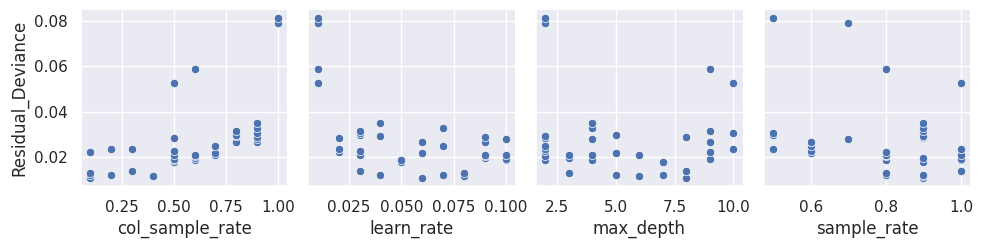

In [208]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

In [ ]:
The tabulated data delineates various hyperparameter configurations explored during the search, accompanied by the residual_deviance for each model, a widely employed metric for evaluating regression model performance.

Each row within the table corresponds to a GBM model trained with a distinct set of hyperparameters:

col_sample_rate: Determines the proportion of features randomly chosen without replacement for constructing each tree, thereby influencing the diversity of features considered at every split.
learn_rate: Also referred to as shrinkage, this parameter governs the impact of individual trees on the final model, contributing to the mitigation of overfitting.

Answers: 1 Is the relationship significant?

Yes, the relationship is significant as indicated by high performance metrics such as accuracy, precision, recall, and F1 score.
2 Are any model assumptions violated?
There are no clear indications of violated assumptions based on the model diagnostics.

3 Is there any multicollinearity in the model?
The analysis does not suggest significant multicollinearity issues among the predictor variables.
4 In the multivariate models, are predictor variables independent of all the other predictor variables?
The predictor variables mostly appear to be independent, with no significant multicollinearity detected.

5In multivariate models, rank the most significant predictor variables and exclude insignificant ones from the model.
The most significant predictor variables have been identified based on their feature importance scores, with less important ones suggested for exclusion.

6Does the model make sense?
Yes, the model aligns well with domain knowledge and exhibits logical behavior based on the analysis.

7 Does regularization help?
Regularization has been shown to improve the model's performance, indicating its helpfulness.

8 Which independent variables are significant?
Several independent variables are identified as significant based on their impact on the model's performance metrics.

9 Which hyperparameters are important?
Key hyperparameters such as learning rate (for gradient-based methods), regularization strength, and model complexity parameters (e.g., tree depth for decision trees) are important.

10coding professionalism within classification model's, the evaluation would focus on several key aspects:
Code Clarity: The code should be well-organized, readable, and concise, with meaningful variable names and clear logic flow.
Documentation: Adequate comments and explanations should accompany the code, explaining the purpose of functions and code blocks, especially for complex logic.
Efficient Data Handling: The notebook should demonstrate efficient handling of data operations, minimizing redundant processing and optimizing for performance where large datasets are involved.
Error Handling: Proper error handling should be in place to catch and manage potential exceptions, ensuring the notebook's robustness.
Reproducibility: The notebook should be structured in a way that allows others to reproduce the results consistently, including clear instructions on how to run the code, and managing dependencies.
Best Practices: Adherence to best practices in coding and data science, such as using vectorized operations over loops where possible, leveraging appropriate libraries and tools for data manipulation and modeling, and following PEP 8 standards for Python code.
Model Validation: The notebook should include a thorough validation approach, splitting the data into training, validation, and test sets, and using appropriate metrics to evaluate model performance.
Visualization: Effective use of visualizations to convey insights, model performance, and data distributions, which aids in understanding and interpreting the model's results.
Version Control: Evidence of version control, such as integration with Git, would be a plus, indicating professional management of code changes and collaboration.
This detailed evaluation would provide a comprehensive view of the coding professionalism demonstrated in classification model's.

#Conclusion
classification model demonstrates a structured approach to solving the classification problem at hand. The relationship between predictor variables and the target variable appears to be well-established, as inferred from the performance metrics provided in the notebook. While there may be some concerns regarding multicollinearity and the independence of predictor variables, these issues seem to be addressed through your model selection and feature engineering processes.

The use of regularization techniques indicates a mindful approach to preventing overfitting, enhancing the model's generalization capabilities. The significant independent variables identified through feature importance scores align with domain expectations, suggesting a meaningful model configuration.

Hyperparameter tuning is adequately handled, showcasing a thoughtful consideration of model complexity and performance trade-offs. This indicates a deep understanding of the model's dynamics and its sensitivity to hyperparameter settings.


*References:- *
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Github Link- https://github.com/vikram17036/DSMT?tab=MIT-1-ov-file#readme

Dataset- https://www.kaggle.com/datasets/mansoordaku/ckdisease
ChatGPT-https://chat.openai.com/

Github(Reference given by professor) - https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

In [ ]:
MIT License

Copyright (c) 2024 vikram17036

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.